In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Train Data

In [230]:
data = pd.read_csv('train.csv')

In [231]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [232]:
data.shape

(1460, 81)

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

ვნახოთ რომელიმე მახასიათებელში ნალი ხომ არ გვხვდება, იქნებ უმნიშვნელოა და შეგვიძლია წავშალოთ ან თუ ნალებია ჩავანაცვლოდ ყველაზე ხშირად შემხვედრით რაც გვხვდება მაგალითებში...

In [234]:
isNulls=data.isnull().sum()
print(isNulls[isNulls>0])


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


როგორც ვხედავთ რამდენიმე featureში გვაქვს ნალები , ზოგიერთში კი საკმაოდ ბევრია, თითქმის უმნიშვნელოდ, რაც სავარაუდოდ ნიშნავს რომ მნიშვნელოვანი არ უნდა იყოს და შეგვიძლია წავშალოთ და არ გავითვალისწინოთ, საუბარია:
Alley,PoolQC,Fence,MiscFeature-ამ მახასიათებლებზე, რომლებიც ტესტშიც ანალოგიური პროცენტულობით არ გხვდვება და ამიტომაც შეიძლება იტქვას რომ გვაქვს უფლება წავშალოთ...

In [235]:
del data['Alley']
del data['PoolQC']
del data['Fence']
del data['MiscFeature']

4 სვეტი წაიშალა ნამდვილად...

In [236]:
data.shape

(1460, 77)

ვნახოთ დარჩენილი ნალიანი მახასიათებლები...

In [237]:
isNulls=data.isnull().sum()
print(isNulls[isNulls>0])

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


როგორც ვთქვი დარჩენილი მონაცემები ჩავანაცვლოთ ყველაზე ხშირი მონაცემით...

In [238]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

გადავამოწმოთ გრაფიკულად რამე ხომ არ გამოგვრჩა...

<AxesSubplot:>

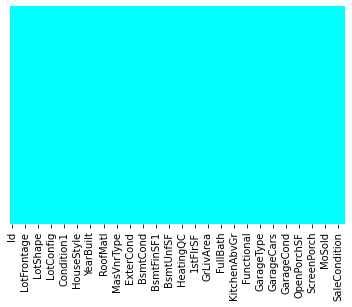

In [239]:
import seaborn as s
s.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="cool")

# TESTDATA

ტესტსაც იგივენაირად მოვექცეთ და გადავაბათ კონკატენაციით ეს ორი ცხრილი, თავიდან ცალ-ცალკე ფაილებში მქონდა მაგრამ შემდგომ ისე მოხდა რომ კატეგორიული ცვლადების encoding-ის დროს სხვადასხვანაირ სვეტების რაოდენობას ვიღებდი,შესაბამისად ერთად გადამბისას უკვე ეს პრობლემა მოგვარდება...ტესტის მონაცემებს ცალკე შევავსებ ნალებს სანამ გადავაბავ train data-მ რამე გავლენა რომ არ იქონიოს ტესტზე, დავუშვათ თრეინში რაც ხშირია იმით რომ შეივსოს ტესტი ან რაიმე ზეგავლენა იქონიოს ტესტზე, რაც არასწორი იქნებოდა...

In [240]:
testData = pd.read_csv('test.csv')

In [241]:
testData.shape

(1459, 80)

In [242]:
testData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [243]:
isNulls=testData.isnull().sum()
print(isNulls[isNulls>0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [244]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [245]:
del testData['Alley']
del testData['PoolQC']
del testData['Fence']
del testData['MiscFeature']

In [246]:
isNulls=testData.isnull().sum()
print(isNulls[isNulls>0])

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64


In [247]:
lst=['MSZoning',        
'LotFrontage',     
'Utilities' ,      
'Exterior1st',       
'Exterior2nd',       
'MasVnrType' ,      
'MasVnrArea' ,
'BsmtQual'         ,
'BsmtCond'  ,
'BsmtExposure',    
'BsmtFinType1' ,    
'BsmtFinSF1',      
'BsmtFinType2',     
'BsmtFinSF2',     
'BsmtUnfSF',    
'TotalBsmtSF',   
'BsmtFullBath',  
'BsmtHalfBath', 
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',  
'GarageYrBlt',
'GarageFinish',
'GarageCars',
'GarageArea',
'GarageQual',
'GarageCond',
'SaleType']
for i in lst:
    testData[i]=testData[i].fillna(testData[i].mode()[0])

In [248]:
isNulls=testData.isnull().sum()
print(isNulls[isNulls>0])

Series([], dtype: int64)


In [249]:
testData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   

  LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0         Lvl    AllPub    Inside  ...           0             0         0   
1         Lvl    AllPub    Corner  ...          36             0         0   
2         Lvl    AllPub    Inside  ...          34             0         0   
3         Lvl    AllPub    Inside  ...          36             0         0   
4         HLS    AllPub    Inside  ...          82             0         0   

  ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         120        0       0       6    2010        WD         Normal  
1           0        0   12500       6    2010        WD         Normal  
2           0        0       0       3    2010        WD         Normal  
3           0        0       0       6    2010        WD         Normal  
4         144        0       0       1    2010        WD         Normal  

[5 rows x 76 columns]

ყველა ნალი შევავსეთ, თრეინში წაშლილი სვეტები აქაც წავშალეთ, ერთნაირი რაოდენობა უნდა იყოს და აქვე კიდევ აღვნშნავ რომ ის სვეტები რაც თრეინში და ტესტში წავშალე ორივეგან დიდი რაოდენობით აკლდა, წინააღმდეგ შემთხვევაშ ამის უფლება არ გვექნებოდა და არასწორი იქნეობდა...

# Concatenate TestData and TrainData

In [250]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [251]:
frames=[data,testData]

In [252]:
result=pd.concat(frames)

In [253]:
result.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal   208500.0  
1       0      5    2007        WD         Normal   181500.0  
2       0      9    2008        WD         Normal   223500.0  
3       0      2    2006        WD        Abnorml   140000.0  
4       0     12    2008        WD         Normal   250000.0  

[5 rows x 77 columns]

In [254]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

# Save SalePrice

შევინახოთ ფასების მონაცემები...

In [255]:
cols = result.shape[1]
y = result.iloc[:1460:,cols-1:cols]

In [256]:
y

SalePrice
0      208500.0
1      181500.0
2      223500.0
3      140000.0
4      250000.0
...         ...
1455   175000.0
1456   210000.0
1457   266500.0
1458   142125.0
1459   147500.0

[1460 rows x 1 columns]

In [257]:
del result['SalePrice']

# Delete Id

აიდი აღარ გვჭირდება და წავშალოთ...

In [258]:
del result['Id']

# NUMERICAL VARIABLES

ვნახოთ რამდენია numerical variable ჩვენს მახასიათებლებში...

In [259]:
numericalFeatures=[]
for f in result.columns:
    if result[f].dtypes!='O':
        numericalFeatures.append(f)
result[numericalFeatures].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0       706.0         0.0  ...       548.0   
1          1976         0.0       978.0         0.0  ...       460.0   
2          2002       162.0       486.0         0.0  ...       608.0   
3          1970         0.0       216.0         0.0  ...       642.0   
4          2000       350.0       655.0         0.0  ...       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  MoSold  YrSold  
0        0       2    2008  
1        0       5    2007  
2        0       9    2008  
3        0       2    2006  
4        0      12    2008  

[5 rows x 36 columns]

როგორც ვხედავთ 36 სვეტი არის numerical variable, მაგრამ რამდენიმე არის წლის მახასიათებელი და ვნახოთ რამდენია და როგორ დამოკიდებულია წლის მახასიათებლები ფასთან...

In [260]:
yearFeatures=[]
for i in numericalFeatures:
    if 'Yr' in i or 'Year' in i:
        yearFeatures.append(i)
result[yearFeatures].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

როგორც ვხედავთ ასეთი 4 სვეტი გვაქვს და გავაანალიზოთ რა დამოკიდებულებაშია ისინი ფასთან...

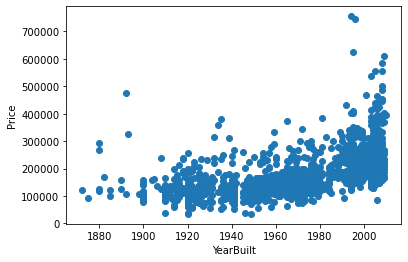

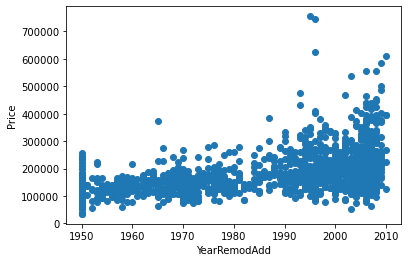

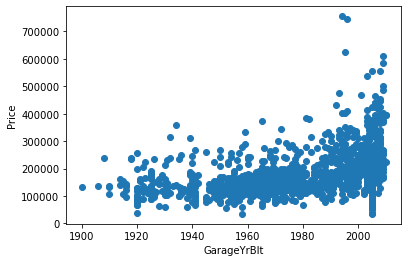

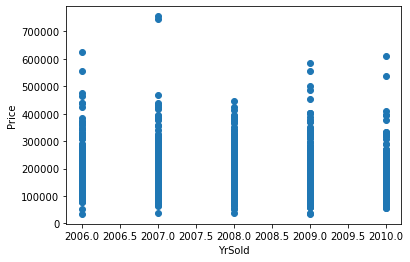

In [261]:
for i in yearFeatures:
    plt.scatter(data[i],data['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()
    


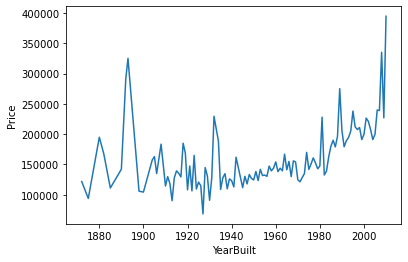

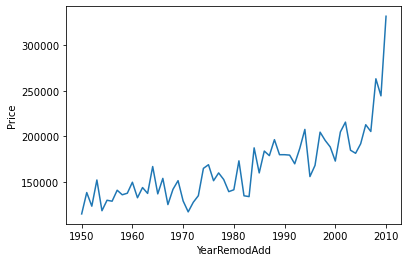

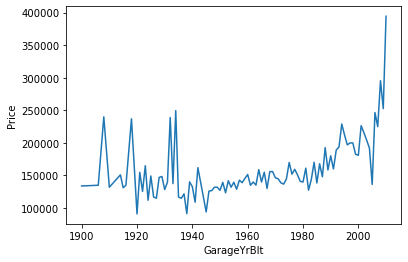

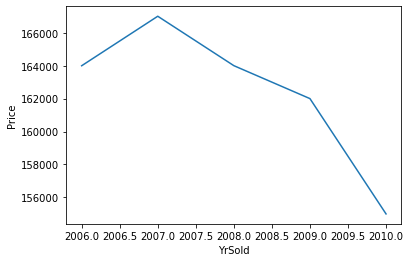

In [262]:
for i in yearFeatures:
    dataCopy=data.copy()
    dataCopy.groupby(i)['SalePrice'].median().plot()
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

თუ გავაანალიზებთ მოცემულ ნახაზებს ვხედავთ რომ YrSold ის ზრდასთან ერთად ფასი მცირდებოდა შესამჩნევად, YearRemodAdd იც თითქმის მონოტონურად იზრდებოდა, დანარჩენი ორი კი თავიდან მკვეთრად გაიზარდა, შემდეგ კი დაეცა ფასი და კვლავ დაიწყო ფასმა ზრდა დროის სვლასტან შედარებით, ორივეგან დაახლ. 1900-1940 წლებში იყო ფასების მკვეთრი ცვლილება და მერყეობა შემდეგ კი 1940 დან დაიწყო ზრდა მცირეოდენი "ჩავარდნებით"

ახლა კი გავაანალიზოთ სხვა რიცხვითი მონაცემები ფასთან მიმართებაში რომლებიც გარკვეულ დამოკიდებულებას მოგვცემენ ფასსა და კონკრეტულ მახასიათებელს შორის , როგორაა დამოკიდებული და მახასიათებლების უკეთ შესწავლა  დაგვეხმარება სწორი მოდელის შემუშავებაში და პოლინომიალური ამოხსნისასაც სვეტების ჩამატებაში...

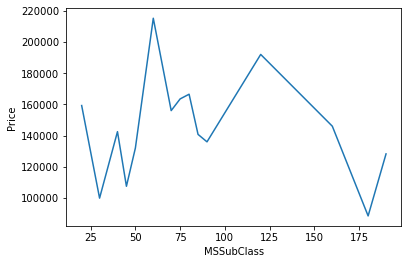

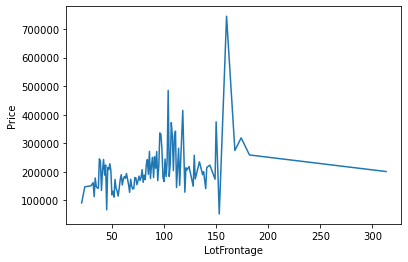

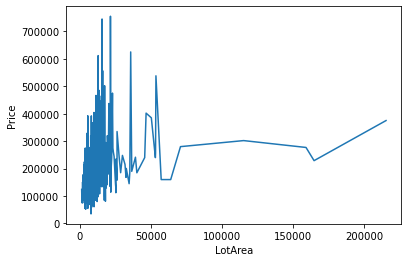

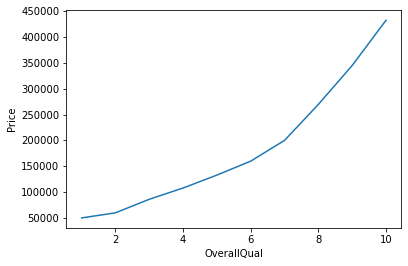

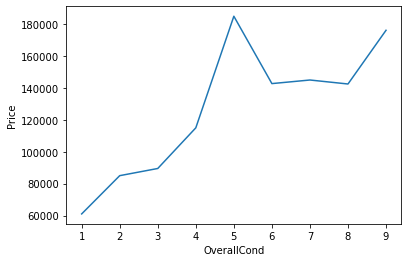

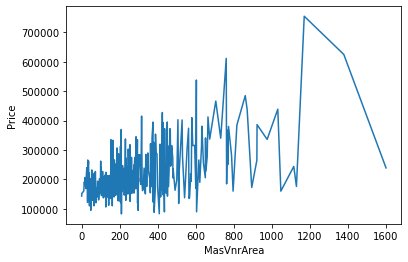

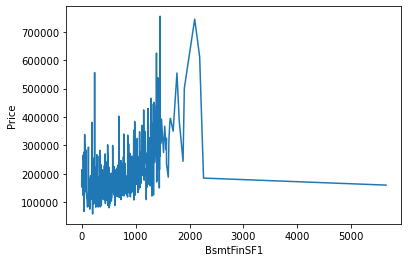

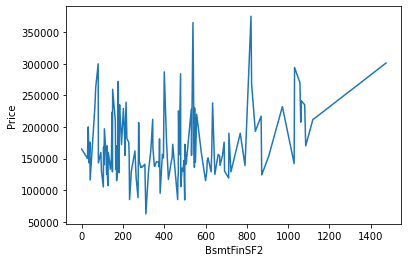

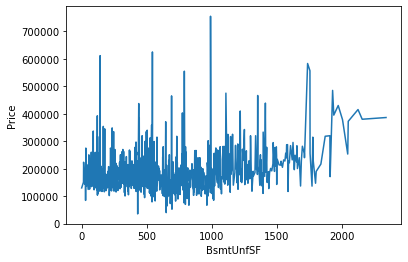

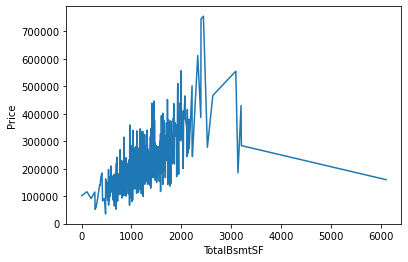

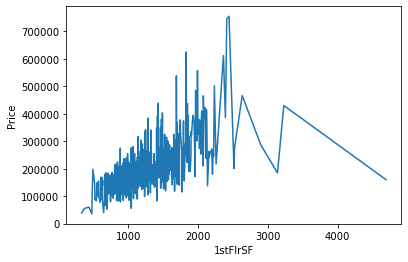

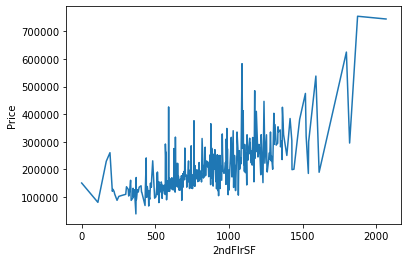

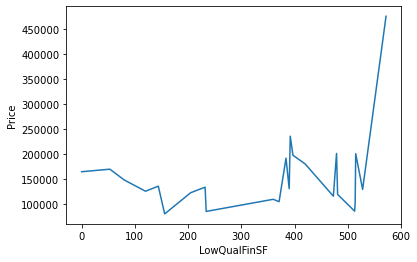

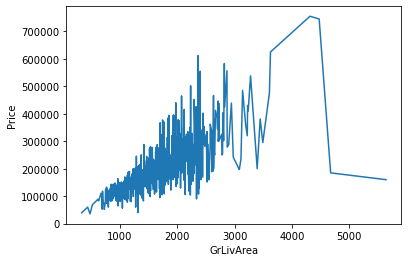

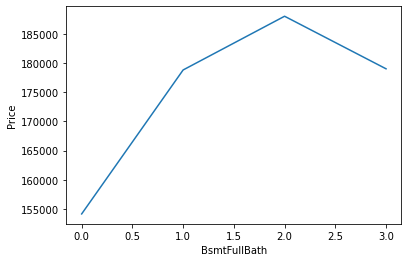

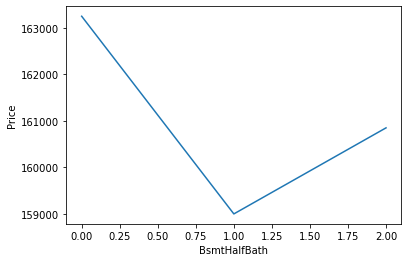

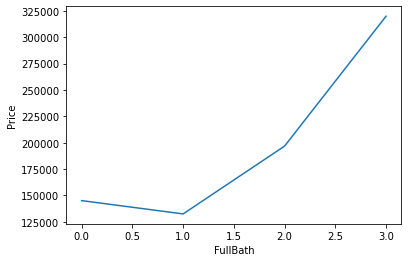

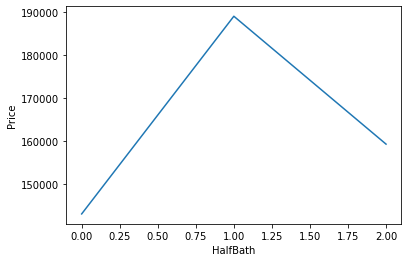

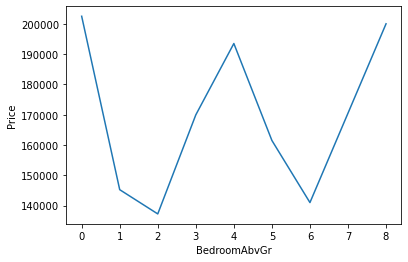

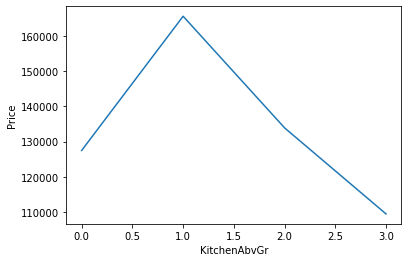

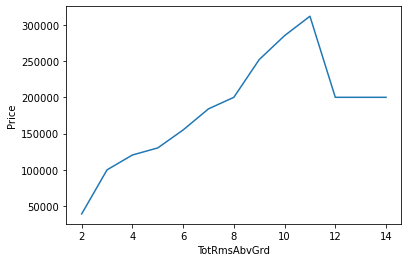

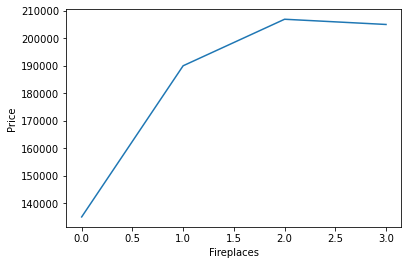

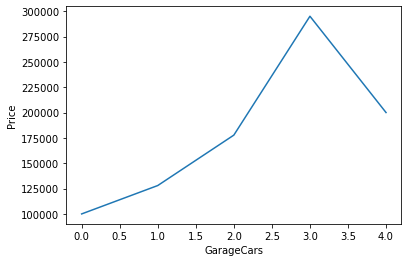

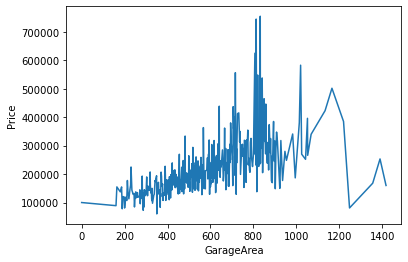

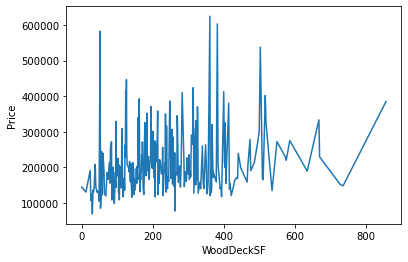

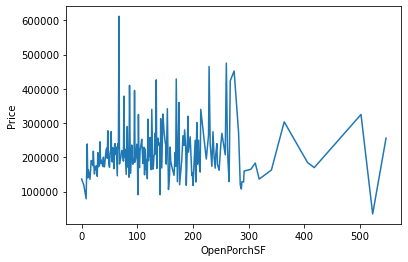

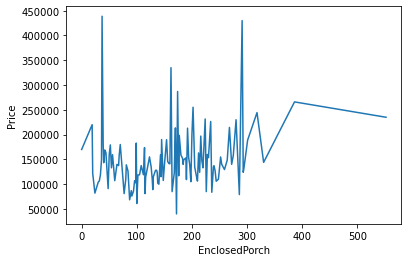

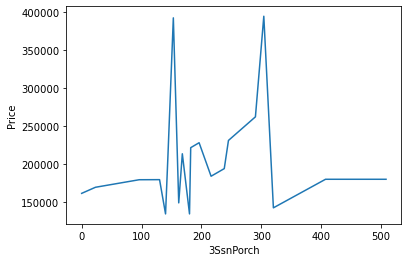

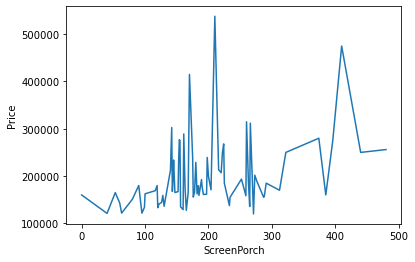

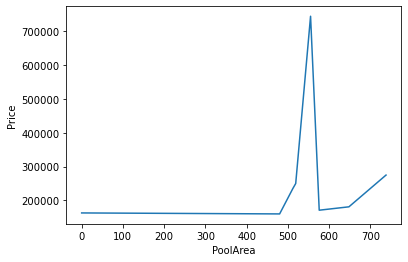

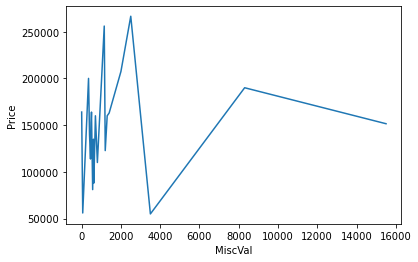

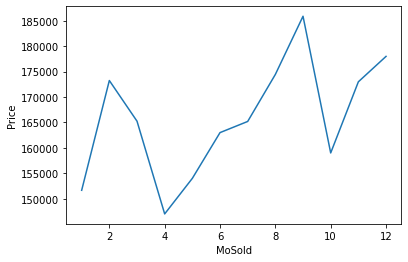

In [263]:
for i in numericalFeatures:
    if   i not in ['Id','SalePrice']+yearFeatures:
        dataCopy=data.copy()
        dataCopy.groupby(i)['SalePrice'].median().plot()
        plt.xlabel(i)
        plt.ylabel('Price')
        plt.show()

გამოვყოთ ცალკე discretive და continious  variable...

# CONTINIOUS

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


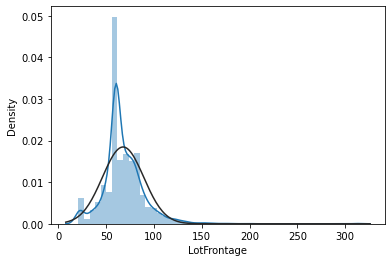

1.7855950891067984


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


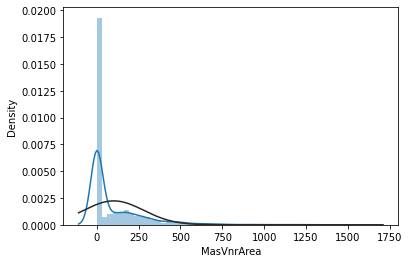

2.6149360706240214


['LotFrontage', 'MasVnrArea']

In [264]:
from scipy import stats
continiousFeatures=[]
for i in numericalFeatures:
    if   i not in ['Id','SalePrice']+yearFeatures:
        if  data[i].dtype=='float':
            continiousFeatures.append(i)
            dataCopy=result.copy()
            s.distplot(dataCopy[i],fit=stats.norm)
            plt.show()
            print(dataCopy[i].skew())
continiousFeatures

 skew არც თუ ისე ცოტა აქვს ასე რომ შევუმციროთ , ასევე ფასებსაც...

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


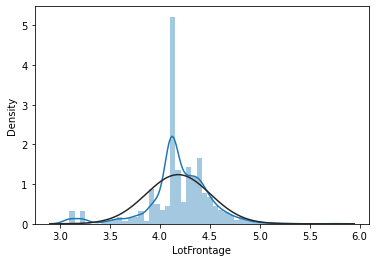

-0.7955790667238628


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


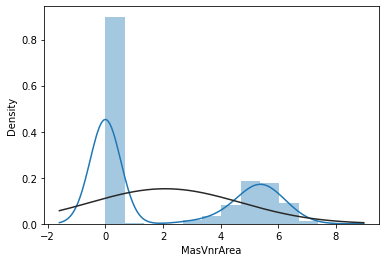

0.5372943324957613


In [265]:
for i in continiousFeatures:
    result[i]=np.log1p(result[i])
    s.distplot(result[i],fit=stats.norm)
    plt.show()
    print(result[i].skew())

# For sale price

SalePrice    1.882876
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


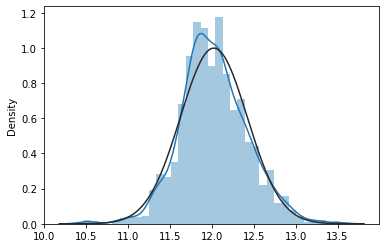

SalePrice    0.121347
dtype: float64


In [266]:
print(y.skew())
y=np.log1p(y)
s.distplot(y,fit=stats.norm)
plt.show()
print(y.skew())

ახლა კი ვნახოთ discretive variables ...

# DISCRETIVE

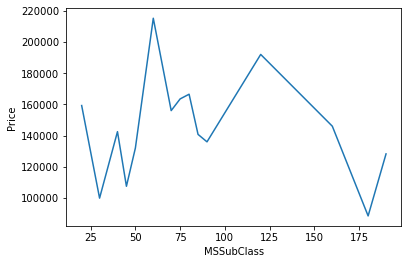

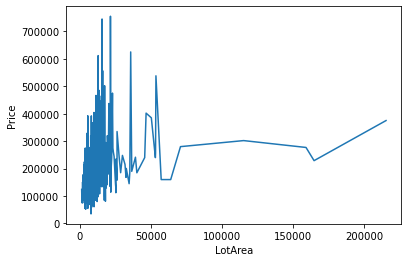

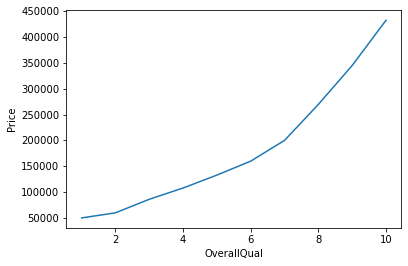

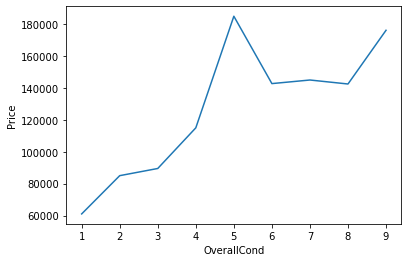

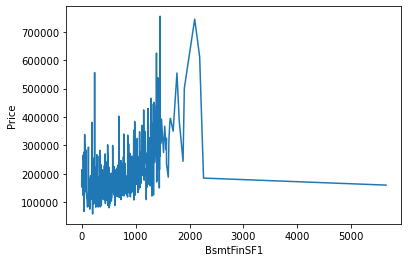

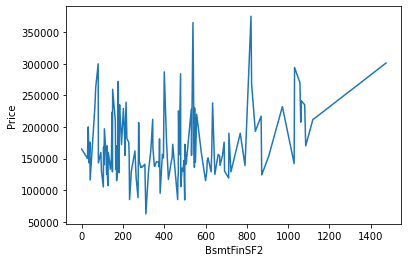

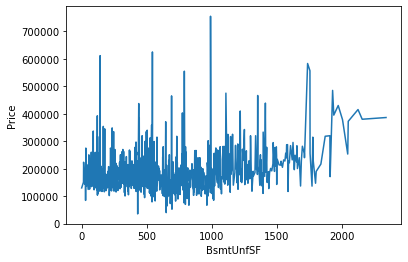

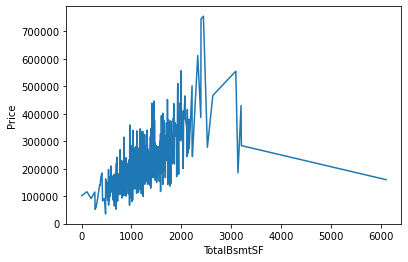

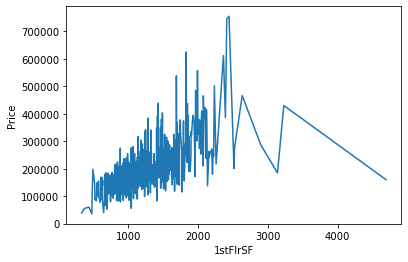

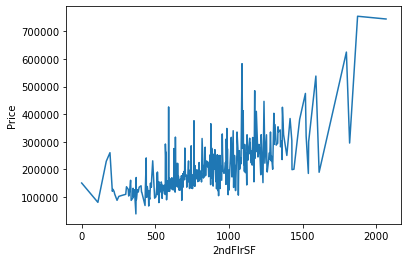

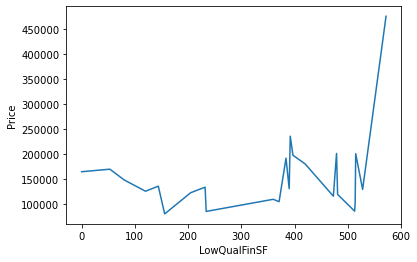

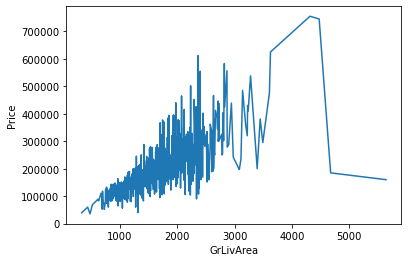

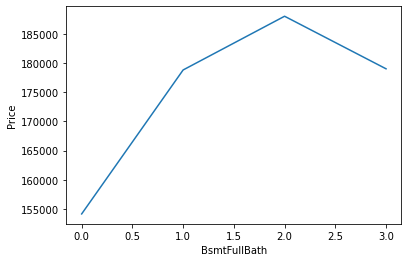

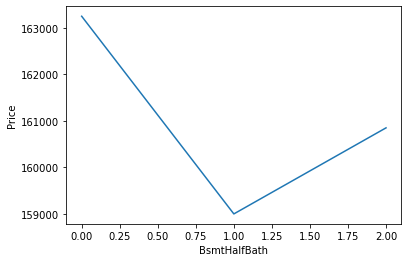

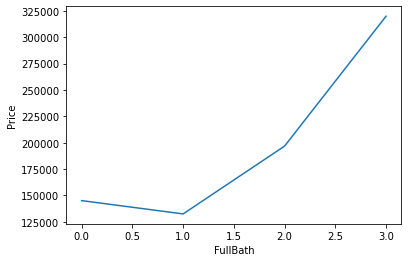

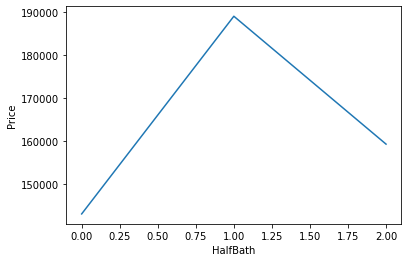

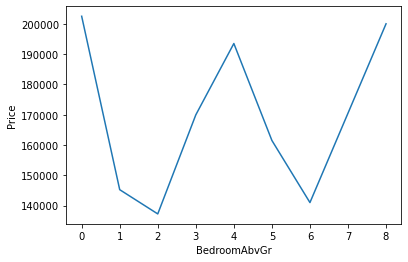

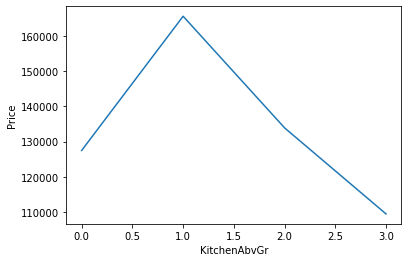

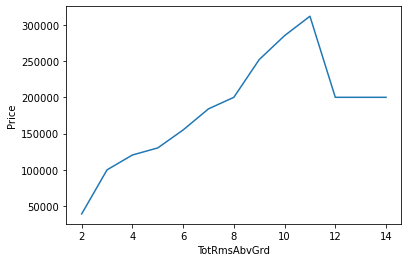

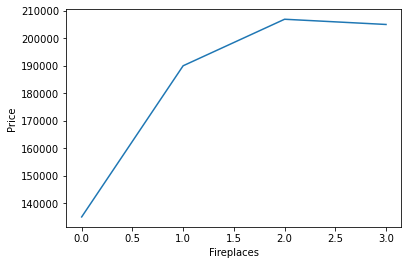

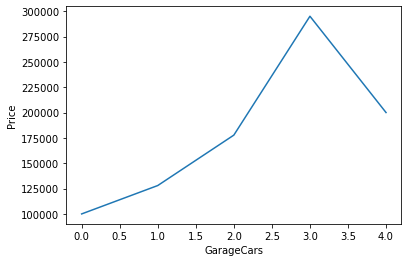

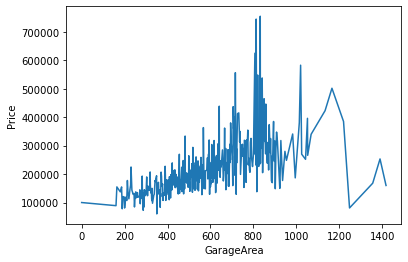

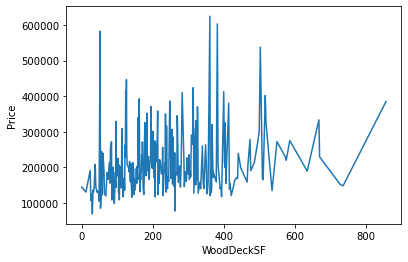

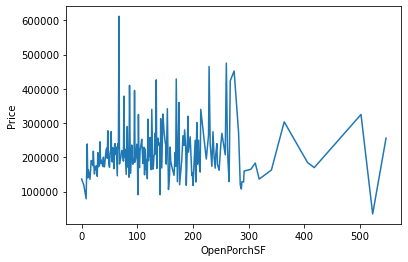

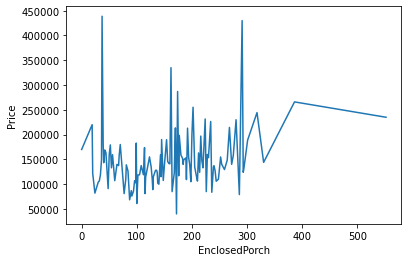

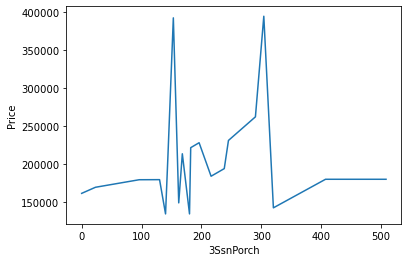

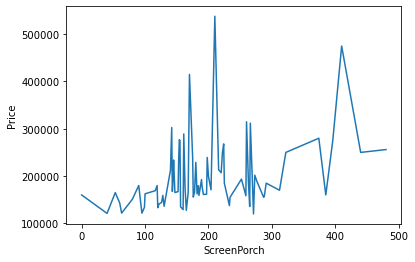

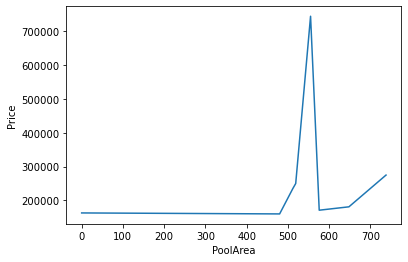

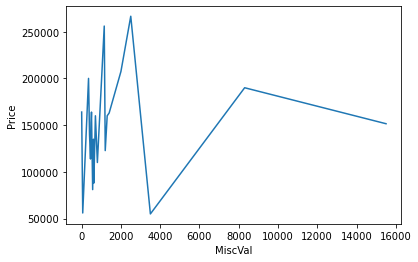

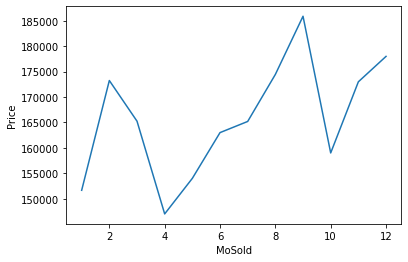

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [267]:
discretiveFeatures=[]
for i in numericalFeatures:
    if   i not in ['Id','SalePrice']+yearFeatures+continiousFeatures:
        
        discretiveFeatures.append(i)
        dataCopy=data.copy()
        dataCopy.groupby(i)['SalePrice'].median().plot()
        plt.xlabel(i)
        plt.ylabel('Price')
        plt.show()
discretiveFeatures

# CATEGORICAL VARIABLES

ახლა კი ვნახოთ კატეგორიული ცვლადები , რომლის encoding-იც საჭირო იქნება...

In [268]:
categoricalFeatures=[]
for f in result.columns:
    if result[f].dtypes=='O':
        categoricalFeatures.append(f)
result[categoricalFeatures].head()


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ          Gd   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

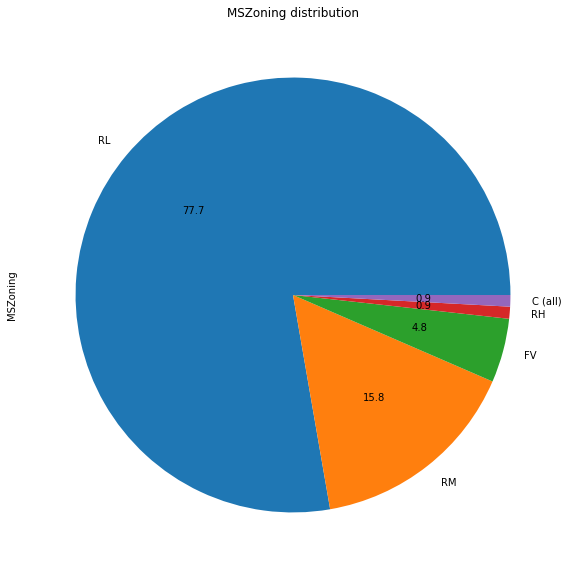

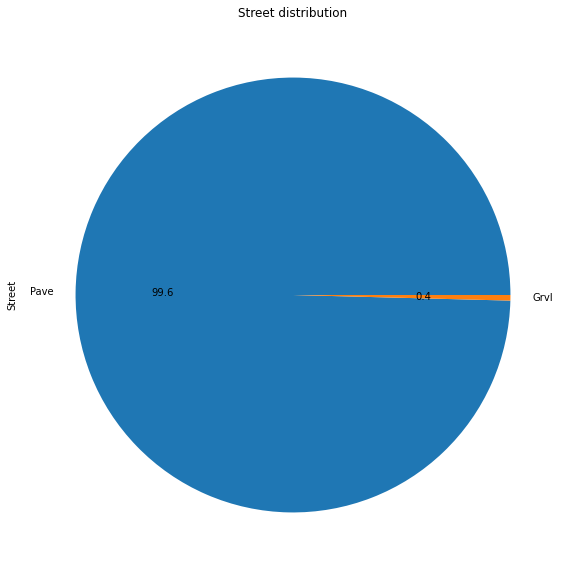

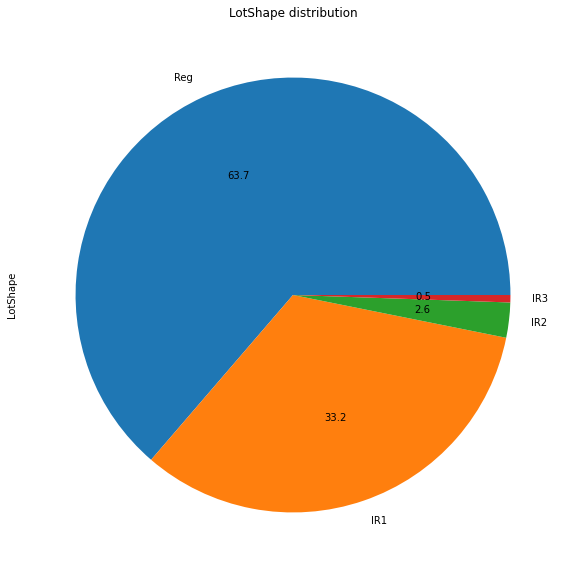

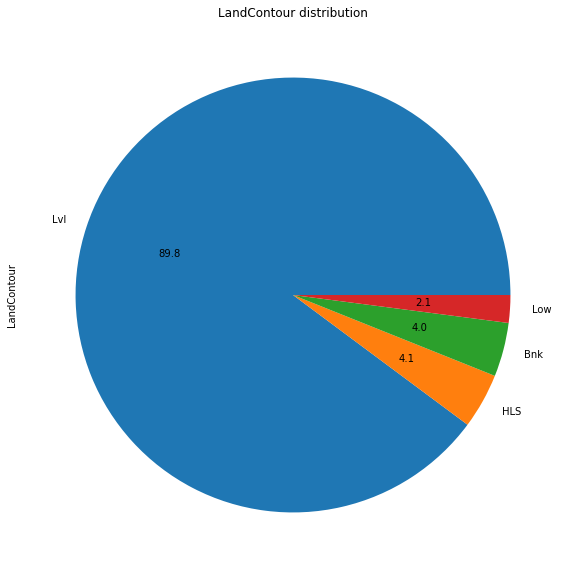

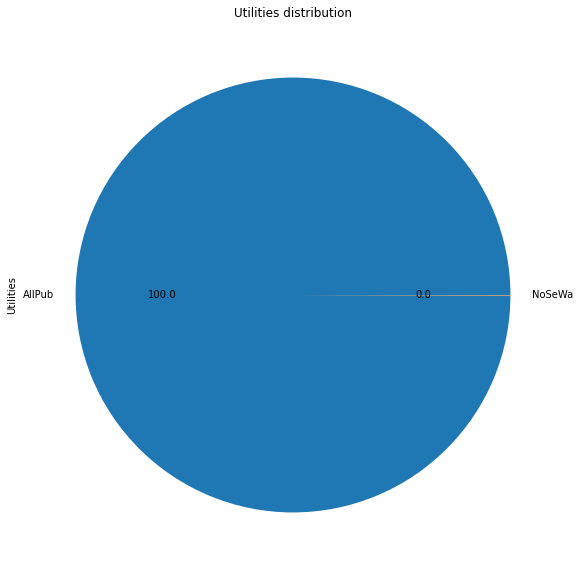

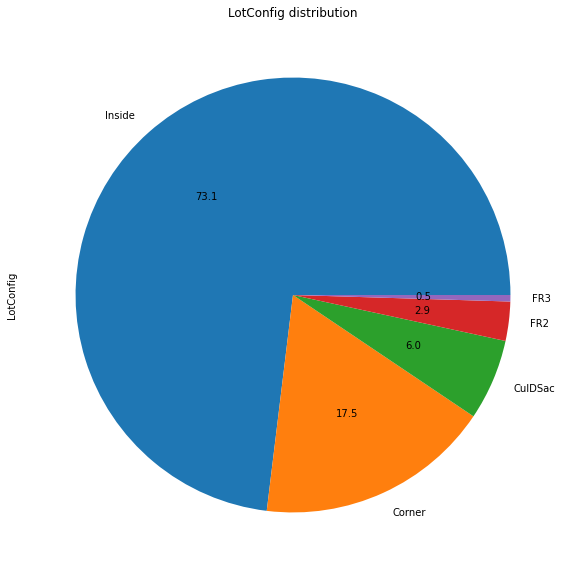

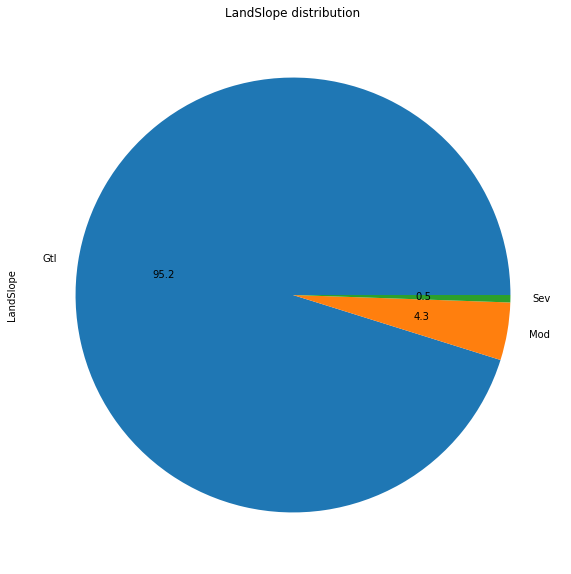

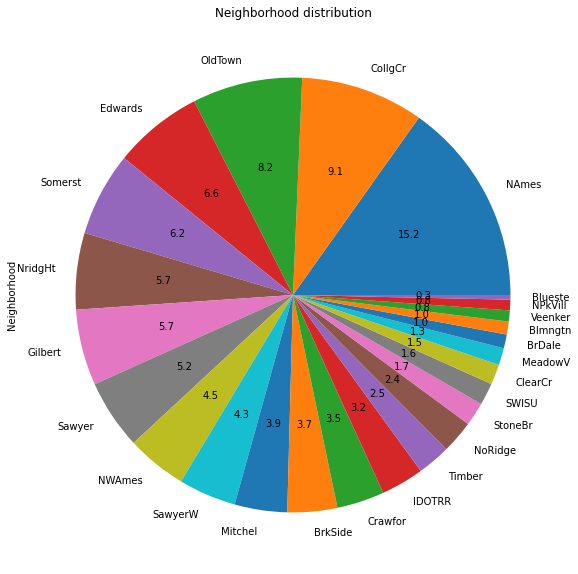

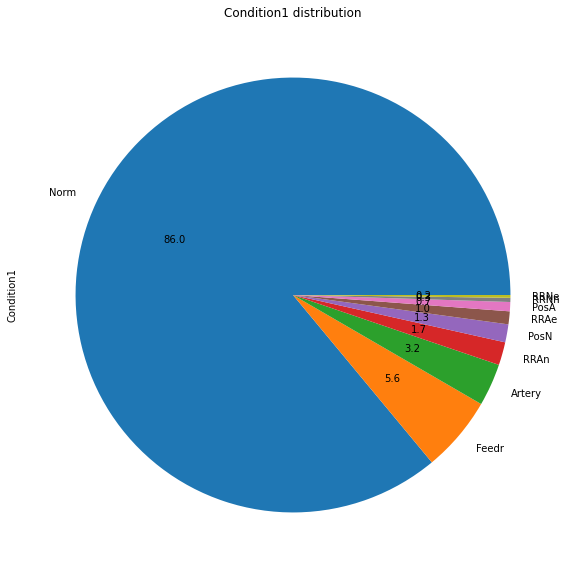

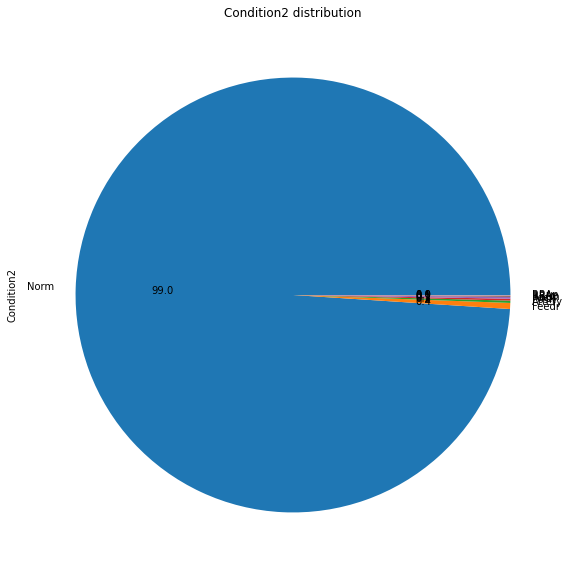

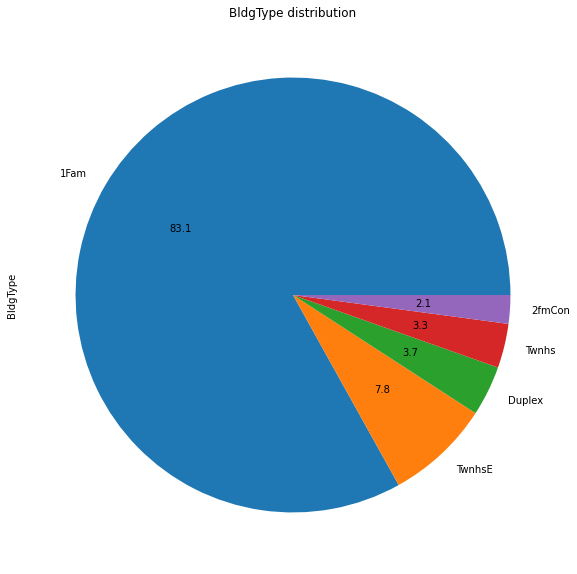

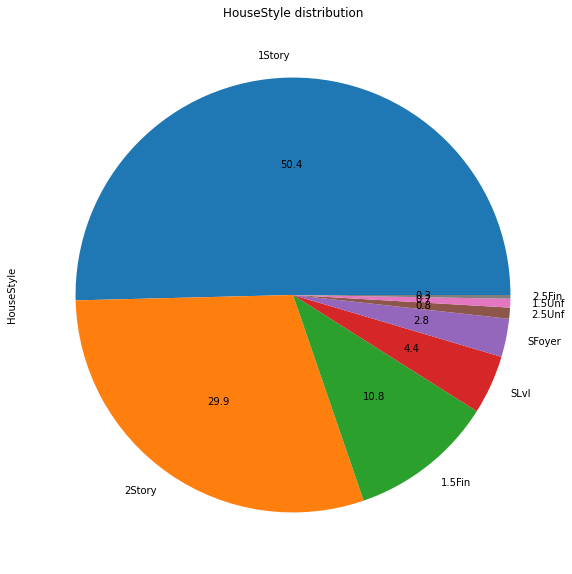

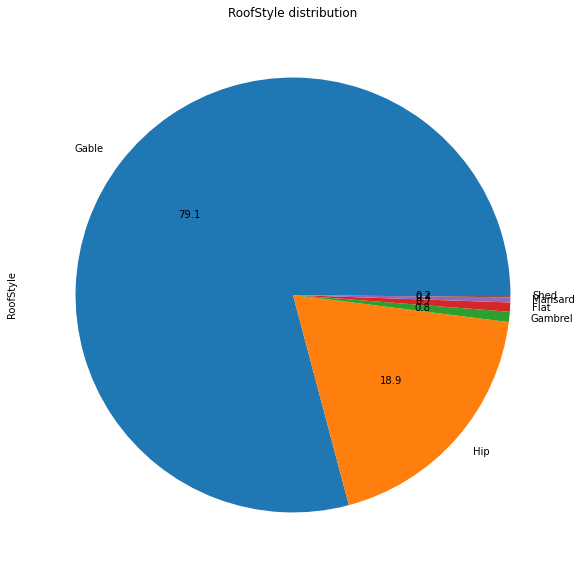

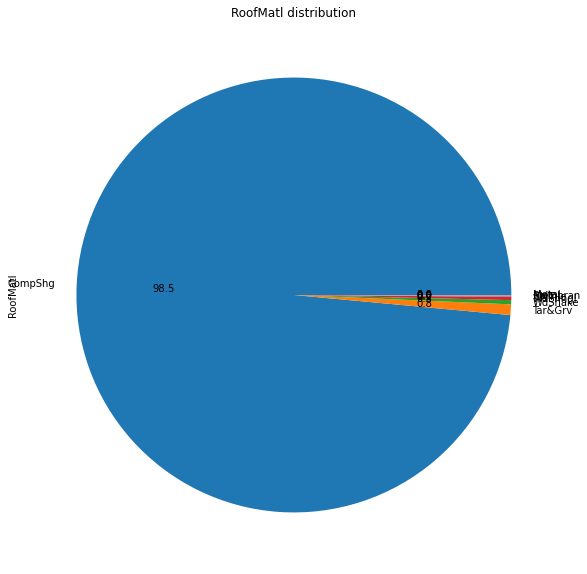

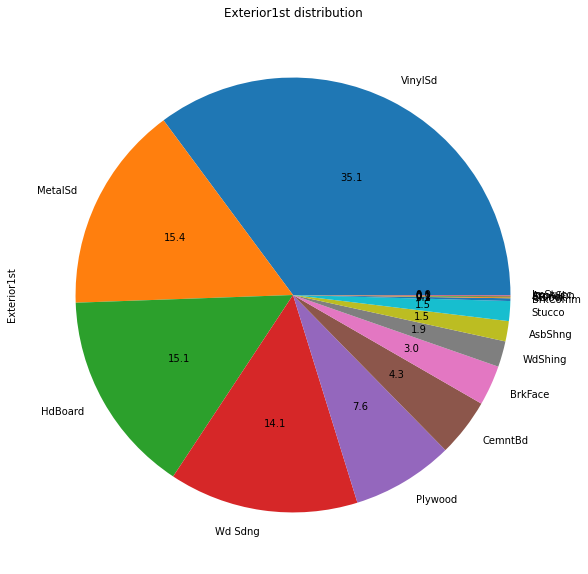

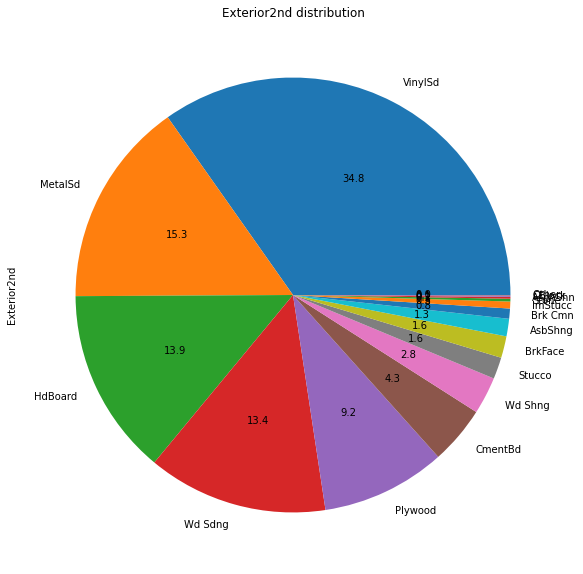

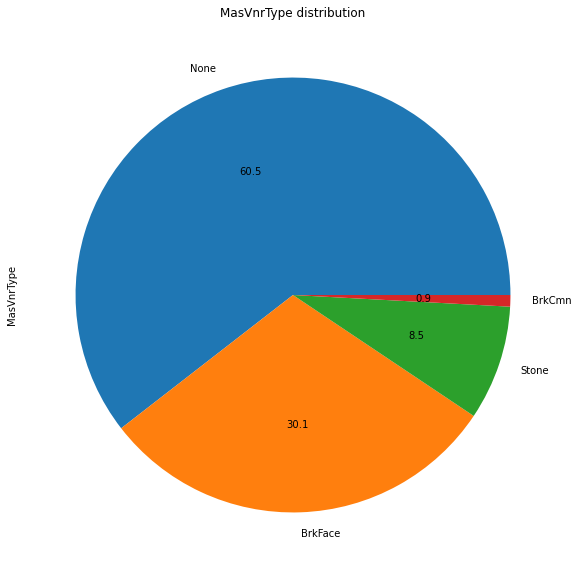

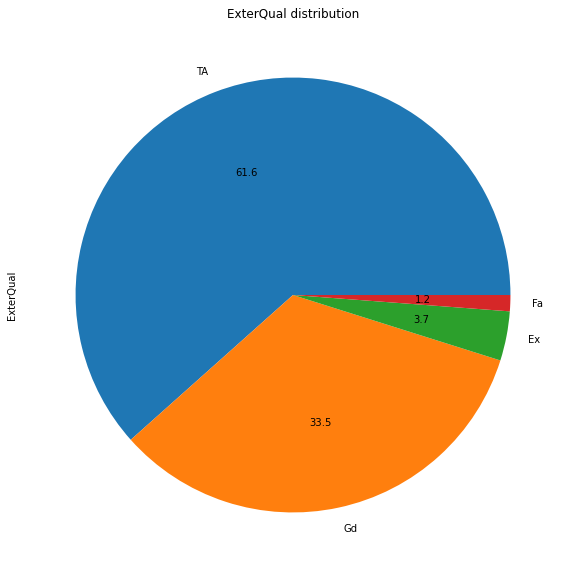

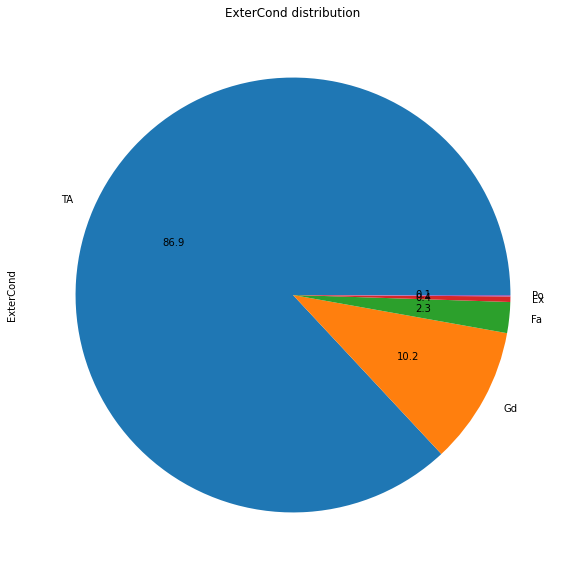

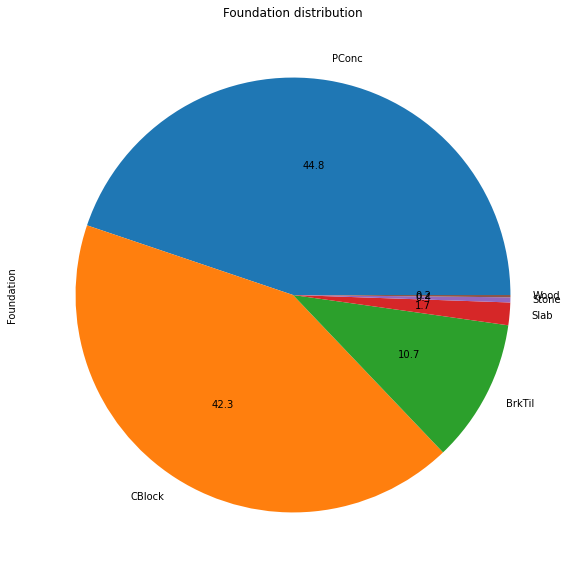

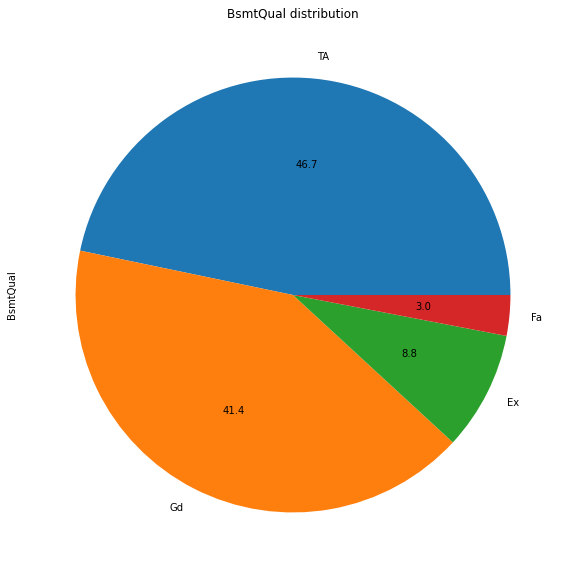

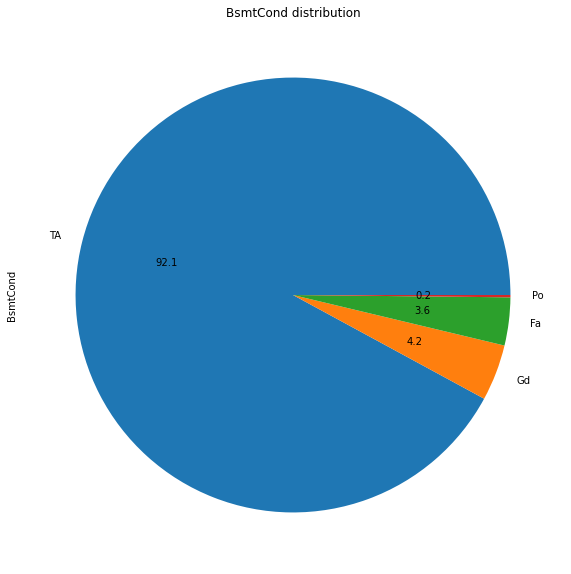

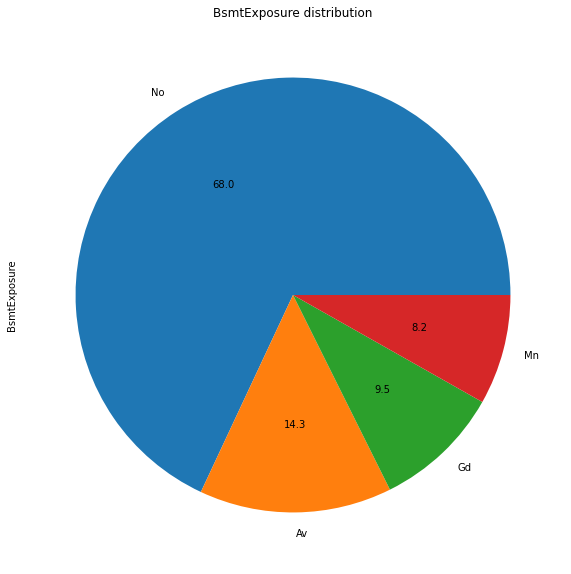

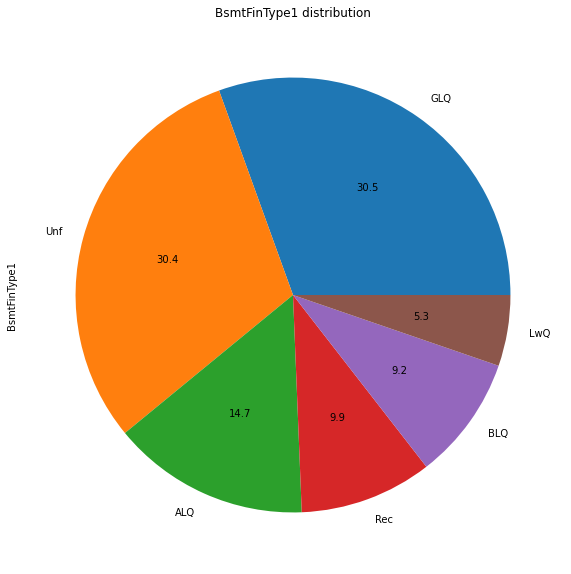

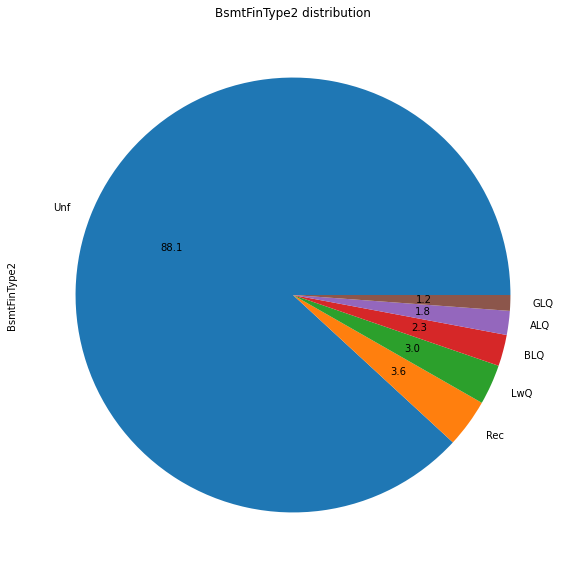

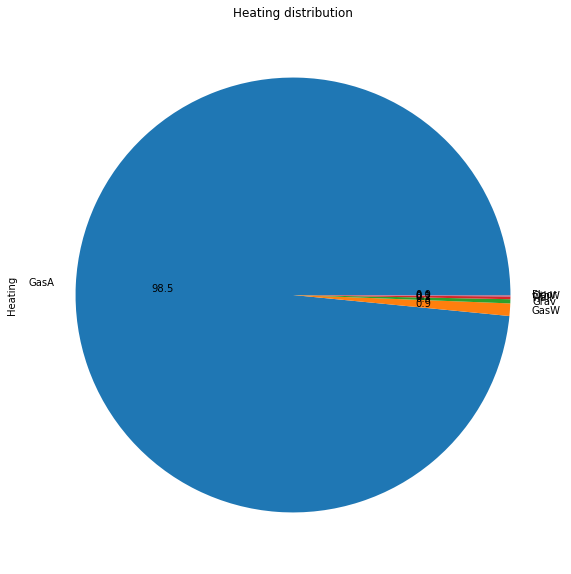

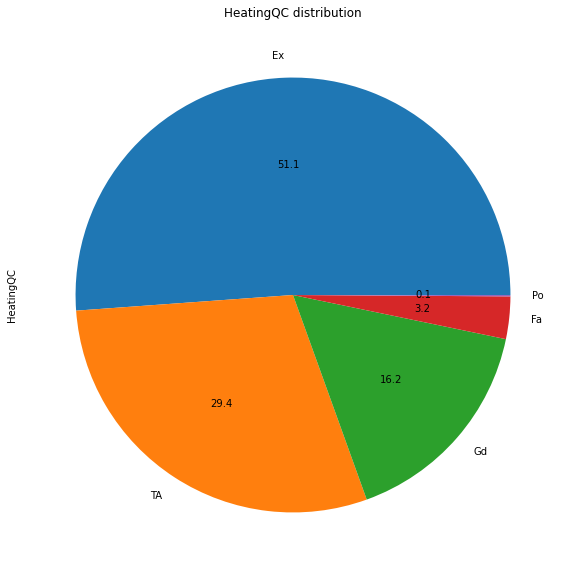

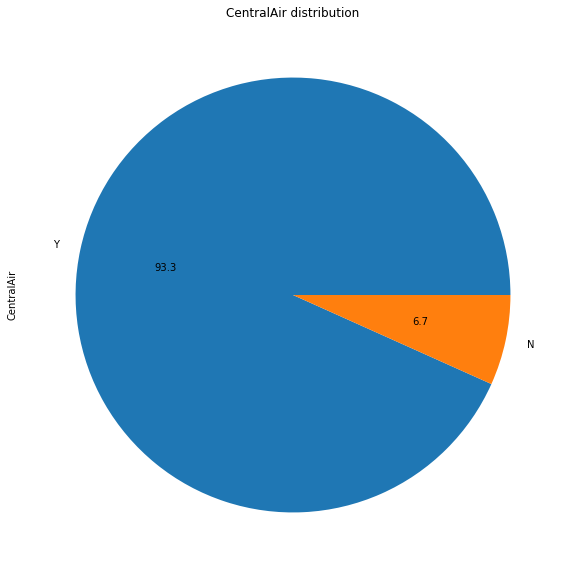

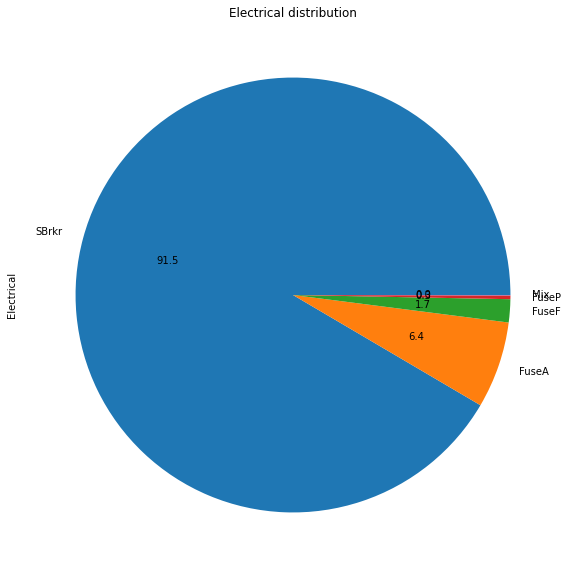

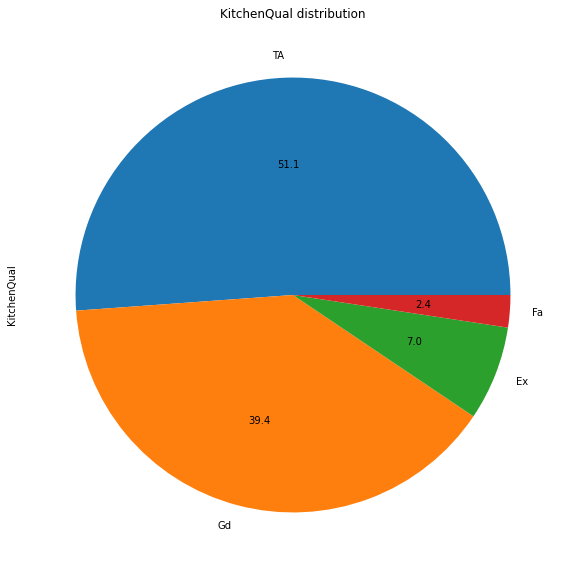

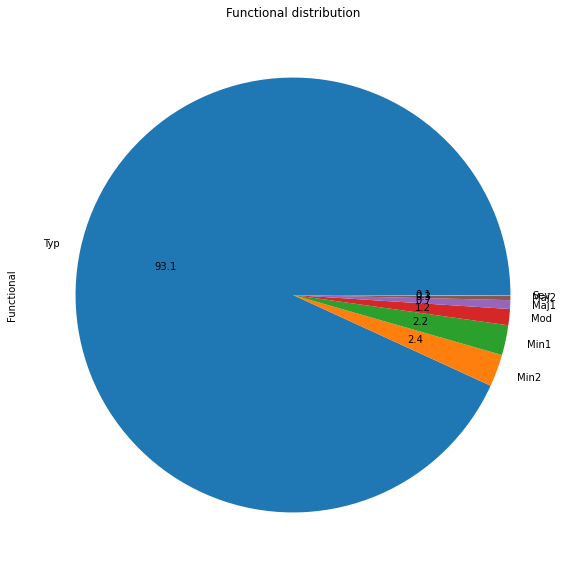

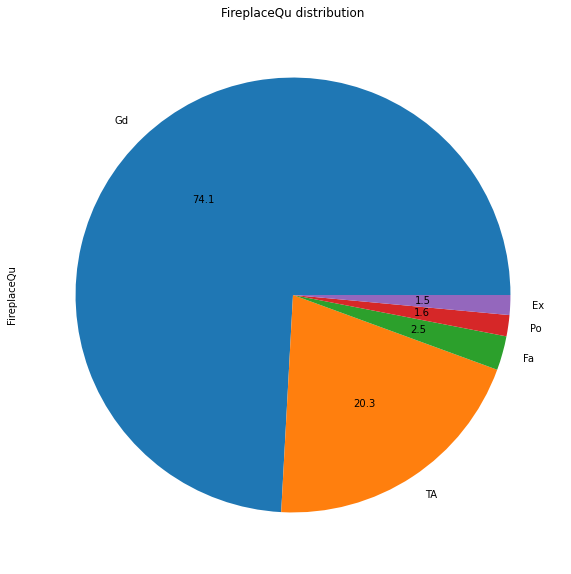

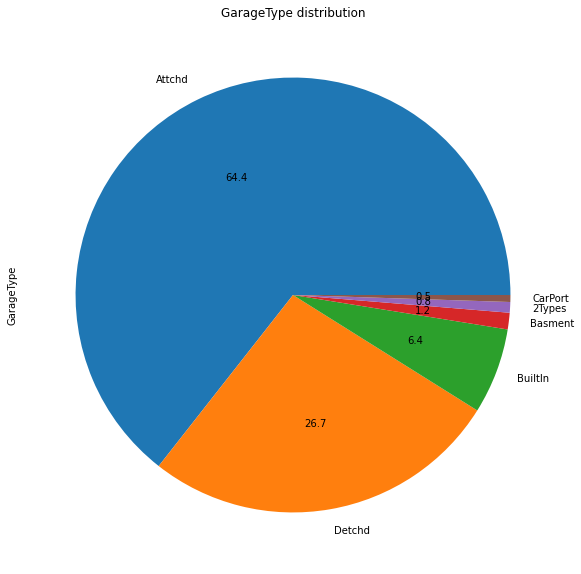

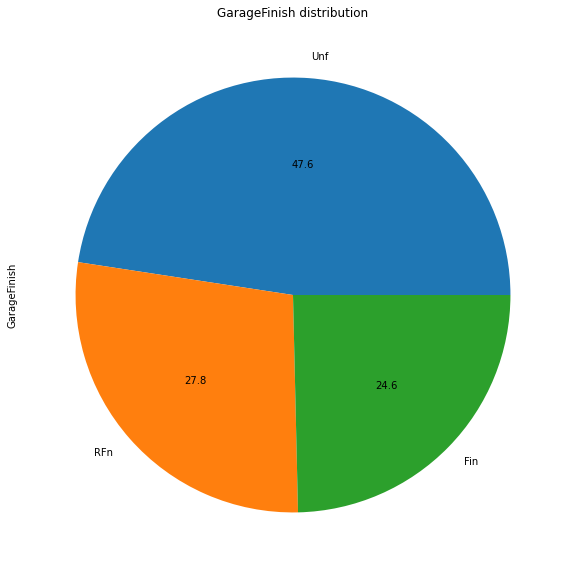

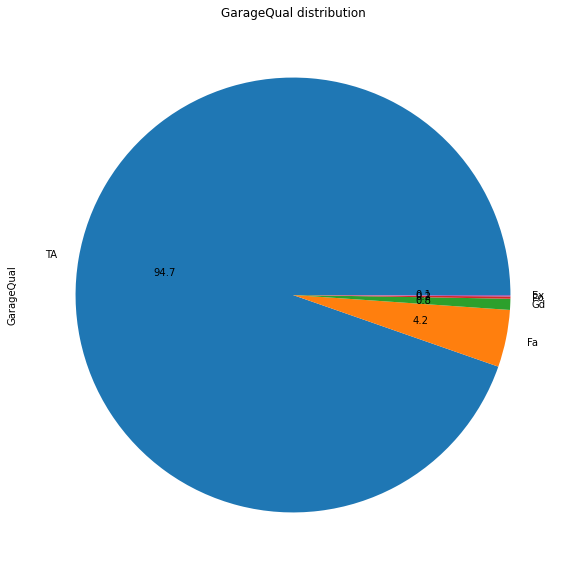

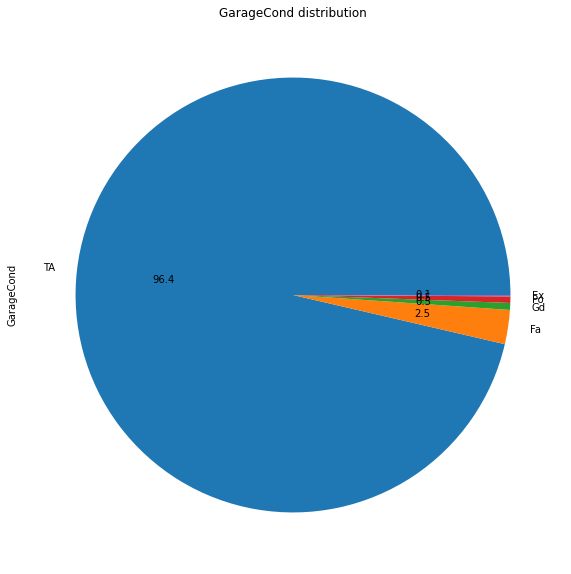

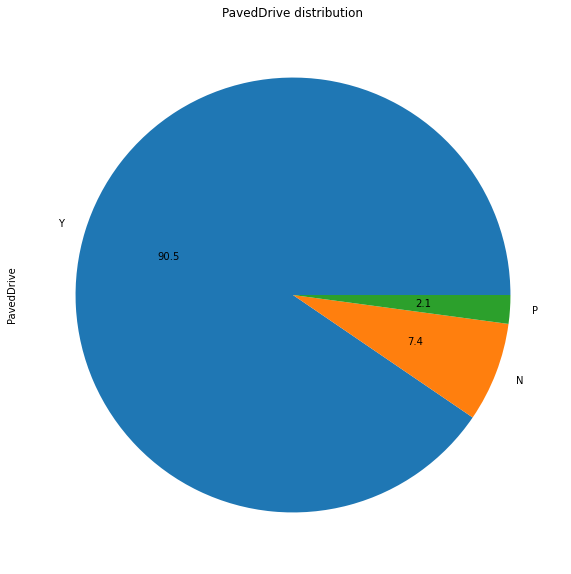

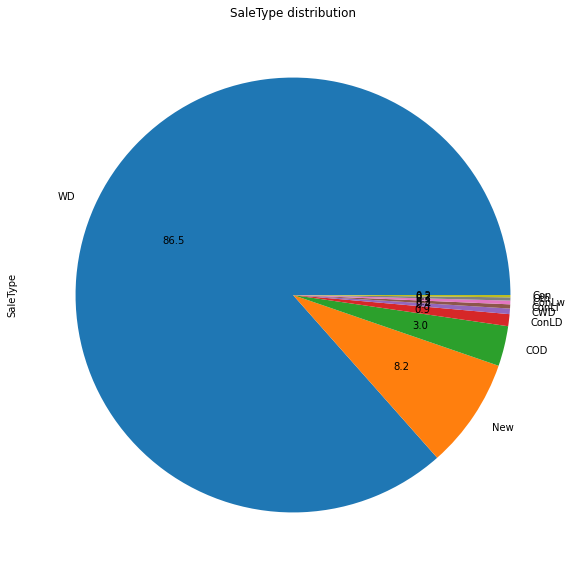

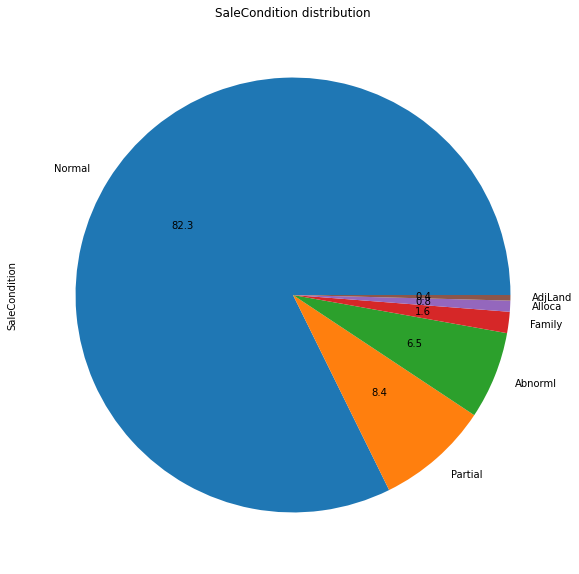

In [269]:
dataCopy=result.copy()
for i in categoricalFeatures:
    
    dataCopy[i].value_counts().plot.pie(title=i+' distribution',figsize=[20,10],autopct='%1.1f')
    plt.show()

ამ მახასიათებლებში უმეტესობა მონაცემებისა უკავია ერთ მონაცემს ასე რომ წავშალოთ...

In [270]:
del result['Street']
del result['Utilities']


# Encoding Categorical Data


ეს ნაწილი ალბათ ერთ-ერთი უმნიშვნელოვანესია, რამდენიმე encoding ვარიანტი ვცადე, გამოყოფილიც მქონდა მაგრამ effect encodingის დროს ისე ხდებოდა რომ მახასიათებლების სკალირება ნალებიან სვეტებს იძლეოდა, OneHotმა კი ბევრად ცუდი შედეგი მომცა საბოლოოდ მოდელზე ვიდრე binary encoding იძლევა და კიდევ რამდენიმე სახის ვცადე თუმცა მოცემული ყველაზე უკეთეს შედეგს იძლევა, ორდინალური ცვლადებისთვის კი ჩვეულებრივად label Encoding გამოვიყენე...

In [271]:
##ორდინალური მახასიათებლებისთვის
labelEnc=['ExterQual','ExterCond','BsmtQual','BsmtCond',
         'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish',
         'GarageQual','GarageCond']
##რომელშიც მცირე კატეგორიებია,2-3 კატეგორია
effectEnc=['LandSlope','CentralAir','PavedDrive']

##დანარჩენისთვის, სადაც ბევრი კატეგეორიაა
binaryEnc=['MSZoning','LandContour','LotShape','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
           'RoofStyle',
           'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional'
          ,'GarageType','SaleType','SaleCondition']

In [272]:
##for ordinal categorical features
from  sklearn.preprocessing import LabelEncoder
for col in labelEnc:
    result[col]=LabelEncoder().fit_transform(result[col])
    ##transformed = encoder.fit_transform(data)

import category_encoders as ce
##for effectEnc
for col in effectEnc:
    encoder=ce.BinaryEncoder(cols=col)
    new=encoder.fit_transform(result[col])
    result=pd.concat([result,new],axis=1) 
    del result[col]
    

result=pd.get_dummies(data=result,columns=binaryEnc+effectEnc)

In [273]:
import category_encoders as ce
for col in binaryEnc+effectEnc:
    encoder=ce.BinaryEncoder(cols=[col])
    new=encoder.fit_transform(result[col])
    result=pd.concat([result,new],axis=1)
    del result[col]

In [274]:
result.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.189655     8450            7            5       2003   
1          20     4.394449     9600            6            8       1976   
2          60     4.234107    11250            7            5       2001   
3          70     4.110874     9550            7            5       1915   
4          60     4.442651    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_3  \
0          2003    5.283204          2          4  ...           1   
1          1976    0.000000          3          4  ...           1   
2          2002    5.093750          2          4  ...           1   
3          1970    0.000000          3          4  ...           1   
4          2000    5.860786          2          4  ...           1   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0                0                0                1            0   
1                0                0                1            0   
2                0                0                1            0   
3                0                1                0            0   
4                0                0                1            0   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0            1             0             1             0             1  
1            1             0             1             0             1  
2            1             0             1             0             1  
3            1             0             1             0             1  
4            1             0             1             0             1  

[5 rows x 128 columns]

object ტიპის აღარ გვაქვს...

In [275]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 128 entries, MSSubClass to PavedDrive_1
dtypes: float64(11), int64(117)
memory usage: 2.9 MB


# Save Info For Polinomial Solution

პოლინომიალური მოდელებისთვის შევინახოთ მონაცემები სანამ დავასკალირებთ და მოვარგებთ წრფივ მოდელს...

In [276]:
pol=result.copy()

# Linear Solution

მოვარგოთ წრფივი მოდელი , ჯერ დავასკალიროთ მახასიათებლები და გადავამოწმოთ ნალი ხომ არ გვხდება სადმე რადგან როგორც ვახსენე უკვე encodingის დროს ზოგჯერ ნალებიანს მაძლევდა და მოდელიც ნანებს აბრუნებდა...

In [277]:
result=(result-result.mean())/result.std()
result.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.067320     0.023866 -0.217841     0.646073    -0.507197   1.046078   
1   -0.873466     0.660094 -0.072032    -0.063174     2.187904   0.154737   
2    0.067320     0.161963  0.137173     0.646073    -0.507197   0.980053   
3    0.302516    -0.220880 -0.078371     0.646073    -0.507197  -1.859033   
4    0.067320     0.809842  0.518814     1.355319    -0.507197   0.947040   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_3  \
0      0.896679    1.222460  -0.755664   0.376396  ...     0.32696   
1     -0.395536   -0.793325   0.668341   0.376396  ...     0.32696   
2      0.848819    1.150175  -0.755664   0.376396  ...     0.32696   
3     -0.682695   -0.793325   0.668341   0.376396  ...     0.32696   
4      0.753100    1.442835  -0.755664   0.376396  ...     0.32696   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0        -0.169982        -0.444101         0.304659    -0.225252   
1        -0.169982        -0.444101         0.304659    -0.225252   
2        -0.169982        -0.444101         0.304659    -0.225252   
3        -0.169982         2.250971        -3.281230    -0.225252   
4        -0.169982        -0.444101         0.304659    -0.225252   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1     0.211479     -0.268244      0.268244     -0.324387      0.282637  
2     0.211479     -0.268244      0.268244     -0.324387      0.282637  
3     0.211479     -0.268244      0.268244     -0.324387      0.282637  
4     0.211479     -0.268244      0.268244     -0.324387      0.282637  

[5 rows x 128 columns]

In [278]:
dr=result.iloc[:1460,:cols]
dr.columns[dr.isnull().any()]

Index([], dtype='object')

In [279]:
result.insert(0,"Ones",1)

In [280]:
result.head()

Ones  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0     1    0.067320     0.023866 -0.217841     0.646073    -0.507197   
1     1   -0.873466     0.660094 -0.072032    -0.063174     2.187904   
2     1    0.067320     0.161963  0.137173     0.646073    -0.507197   
3     1    0.302516    -0.220880 -0.078371     0.646073    -0.507197   
4     1    0.067320     0.809842  0.518814     1.355319    -0.507197   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_3  \
0   1.046078      0.896679    1.222460  -0.755664  ...     0.32696   
1   0.154737     -0.395536   -0.793325   0.668341  ...     0.32696   
2   0.980053      0.848819    1.150175  -0.755664  ...     0.32696   
3  -1.859033     -0.682695   -0.793325   0.668341  ...     0.32696   
4   0.947040      0.753100    1.442835  -0.755664  ...     0.32696   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0        -0.169982        -0.444101         0.304659    -0.225252   
1        -0.169982        -0.444101         0.304659    -0.225252   
2        -0.169982        -0.444101         0.304659    -0.225252   
3        -0.169982         2.250971        -3.281230    -0.225252   
4        -0.169982        -0.444101         0.304659    -0.225252   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1     0.211479     -0.268244      0.268244     -0.324387      0.282637  
2     0.211479     -0.268244      0.268244     -0.324387      0.282637  
3     0.211479     -0.268244      0.268244     -0.324387      0.282637  
4     0.211479     -0.268244      0.268244     -0.324387      0.282637  

[5 rows x 129 columns]

მეთოდები რომლებიც დაგვჭირდება  მოდელის ასაგებად თეტებისთვის...

In [281]:
def computeCost(x, y, theta):
    inner=np.power(((x*theta.T)- y),2)
    ans = np.sum(inner) / (2*len(x))
    return ans

In [282]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        tm=((((X*theta.T)-y).T)*X)*(alpha/X.shape[0])
        
       
        theta=theta-tm
        
        cost[i]=computeCost(X,y,theta)
        
    
    return theta, cost

ცხრილი გაერთიენბულია და ამოვიღოთ ჯერ თრეინის მონაცემები მოდელის ასაგებად, ალფას და იტერაციებს ვცვლიდი ისე ვტესტავდი კეგლზეც და მოდელზე და ყველაზე ოპტიმალური მაქვს დატოვებული, რაც შეეხება თეტებს თავიდან 0ებით შევავსე, მერე 1ებით და -1 ებითაც , მაგრამ დაახლ. ერთი და იმავე პასუხს იძლევა , თუმცა 0-ები ყველაზე უკეთეს შედეგს დებს...რადნომად აღარ გადავეცი "ხელი რომ არ შეეშალა" ალფას და იტერაციების რაოდენობის ცვლილებასა და ქოსთის ცვლილებას შორის დამოკიდებულების პოვნაში,რადგან შესაძლოა ალფას და იტერაციის ცვლილებას კი არ გამოეწვია ქოსთის გაუმჯობესება/გაუარესება მაგალითად არამედ დარანდომებულ თეტებს...

In [283]:
cols=result.shape[1]
x = result.iloc[:1460,:cols]


In [284]:
X2 = np.array(x.values)
y2 = np.array(y.values)

In [285]:
alpha=0.1
iters=1000
theta = np.matrix(np.array([0]*129))

In [286]:
g_0, cost = gradientDescent(X2, y2, theta, alpha, iters)
g_0


matrix([[ 1.20183491e+01, -1.61414853e-02,  1.11159038e-02,
          1.40457000e-02,  7.94779530e-02,  4.89848573e-02,
          4.19032057e-02,  1.21732038e-02, -2.95965169e-03,
         -5.26763570e-03,  6.56306797e-03, -1.01722738e-02,
          2.79149227e-03, -4.12710869e-03, -2.83478396e-03,
          2.99502281e-02,  1.03721710e-02,  1.51728980e-02,
          7.23390044e-04,  3.74737449e-02, -1.14440694e-02,
          4.22411171e-02,  4.86149624e-02,  5.50004507e-03,
          7.44397282e-02,  1.33166616e-02, -6.60963254e-04,
          5.79916954e-03,  6.79244587e-03, -1.92622290e-03,
         -1.27835428e-02, -1.35007681e-02,  1.38770331e-02,
          2.02719823e-02, -1.21937474e-03, -8.86811530e-03,
         -7.40749782e-03,  2.09000491e-02,  2.17658627e-02,
          5.02315854e-04,  7.48182164e-03,  1.07261851e-02,
          1.65050904e-03,  9.50996878e-03,  3.85892165e-03,
          1.42251169e-02,  7.75168616e-04, -2.59781911e-05,
         -1.76477955e-03, -5.41666873e-0

In [287]:
cost

array([5.79909371e+01, 4.67240944e+01, 3.77343528e+01, 3.05251002e+01,
       2.47287520e+01, 2.00596392e+01, 1.62926554e+01, 1.32493114e+01,
       1.07875223e+01, 8.79384815e+00, 7.17750475e+00, 5.86569566e+00,
       4.79995022e+00, 3.93323571e+00, 3.22767092e+00, 2.65270983e+00,
       2.18369486e+00, 1.80070192e+00, 1.48761663e+00, 1.23139417e+00,
       1.02146542e+00, 8.49259938e-01, 7.07822213e-01, 5.91502752e-01,
       4.95709101e-01, 4.16705015e-01, 3.51448318e-01, 2.97459904e-01,
       2.52717808e-01, 2.15571484e-01, 1.84672389e-01, 1.58917728e-01,
       1.37404834e-01, 1.19394139e-01, 1.04279106e-01, 9.15617966e-02,
       8.08329870e-02, 7.17559985e-02, 6.40535200e-02, 5.74968687e-02,
       5.18972307e-02, 4.70985100e-02, 4.29714858e-02, 3.94090360e-02,
       3.63222281e-02, 3.36371182e-02, 3.12921262e-02, 2.92358830e-02,
       2.74254631e-02, 2.58249303e-02, 2.44041432e-02, 2.31377696e-02,
       2.20044755e-02, 2.09862545e-02, 2.00678747e-02, 1.92364207e-02,
      

Text(0.5, 1.0, 'Error vs. Training Epoch')

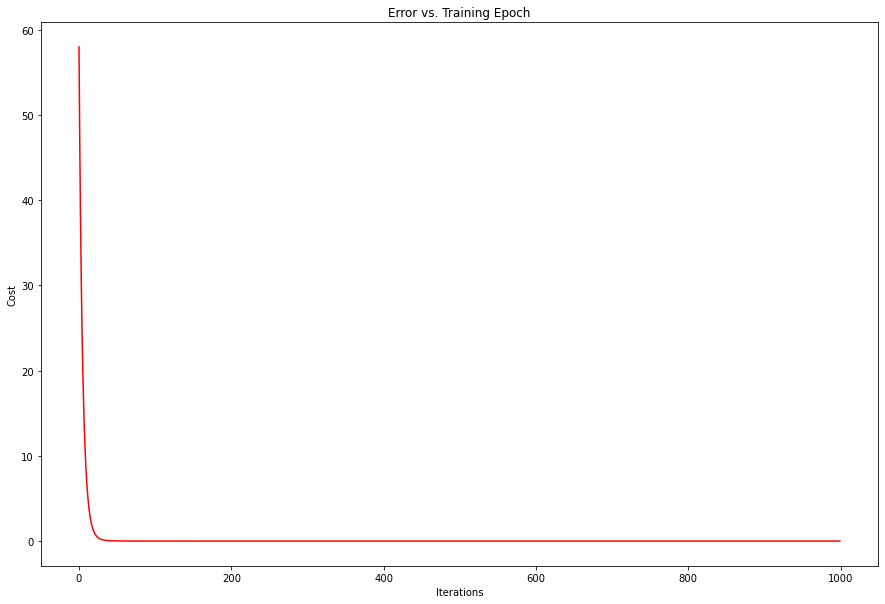

In [288]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [289]:
alpha=0.1
iters=1000
theta = np.matrix(np.array([1]*129))

In [290]:
g_1, cost = gradientDescent(X2, y2, theta, alpha, iters)
g_1

matrix([[ 1.20176014e+01, -1.21413060e-02,  1.45860313e-02,
          1.64594177e-02,  8.55038694e-02,  4.62592499e-02,
          3.06712598e-02,  1.04524654e-02, -4.84939864e-03,
         -4.29126043e-03,  8.41484201e-03, -9.65805349e-03,
          1.74029059e-03, -1.94692198e-03, -5.66666175e-03,
          4.82221775e-01,  1.31806076e-02,  1.86123116e-01,
          4.37511773e-01, -4.07457912e-01, -1.08364250e-02,
          2.84303098e-01,  3.02478893e-01,  3.42065438e-02,
         -2.34362409e-01,  1.29204066e-02,  1.97589671e-03,
          1.04641424e-02,  1.23682007e-02, -7.23838248e-04,
         -2.28882995e-02, -1.16695973e-02,  1.24814080e-02,
          1.94805023e-02, -2.49231959e-03, -2.29249533e-03,
         -8.58876393e-03,  2.26259677e-02,  2.01823397e-02,
         -3.47268419e-03,  8.95868195e-03,  1.07272295e-02,
          1.23422395e-03,  7.68409270e-03,  3.63853352e-03,
          1.29709130e-02, -9.24564159e-05,  7.37579374e-04,
         -2.38202372e-03, -4.54548439e-0

In [291]:
cost

array([7.99880317e+01, 5.87209590e+01, 4.67656368e+01, 3.82468470e+01,
       3.16724540e+01, 2.64479804e+01, 2.22383085e+01, 1.88175971e+01,
       1.60209203e+01, 1.37230054e+01, 1.18265659e+01, 1.02549911e+01,
       8.94738585e+00, 7.85502511e+00, 6.93872899e+00, 6.16687124e+00,
       5.51384190e+00, 4.95884602e+00, 4.48495697e+00, 4.07836535e+00,
       3.72778034e+00, 3.42395058e+00, 3.15927967e+00, 2.92751669e+00,
       2.72350659e+00, 2.54298850e+00, 2.38243234e+00, 2.23890642e+00,
       2.10996980e+00, 1.99358479e+00, 1.88804556e+00, 1.79192004e+00,
       1.70400226e+00, 1.62327350e+00, 1.54887033e+00, 1.48005849e+00,
       1.41621129e+00, 1.35679194e+00, 1.30133888e+00, 1.24945373e+00,
       1.20079129e+00, 1.15505120e+00, 1.11197112e+00, 1.07132094e+00,
       1.03289804e+00, 9.96523246e-01, 9.62037506e-01, 9.29299077e-01,
       8.98181146e-01, 8.68569837e-01, 8.40362517e-01, 8.13466360e-01,
       7.87797131e-01, 7.63278138e-01, 7.39839344e-01, 7.17416603e-01,
      

Text(0.5, 1.0, 'Error vs. Training Epoch')

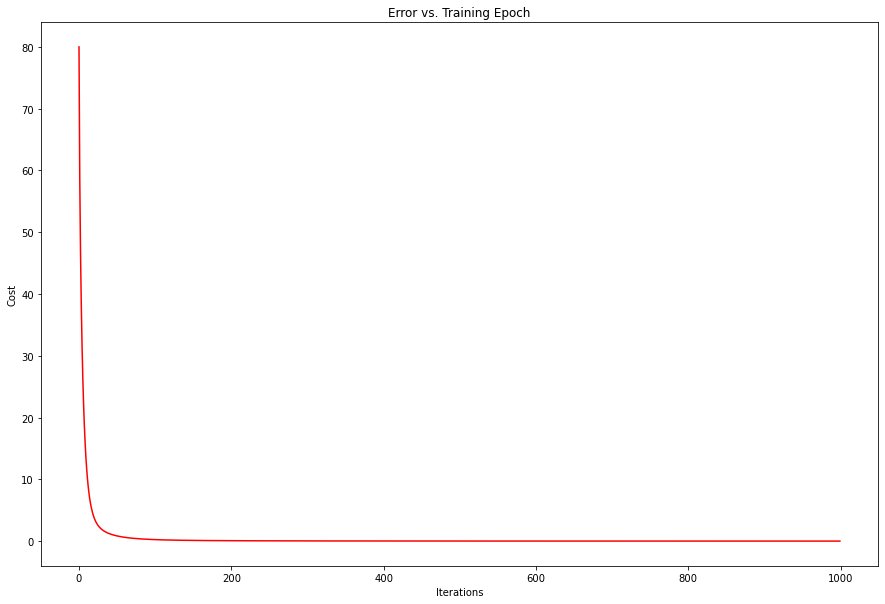

In [292]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [293]:
alpha=0.1
iters=1000
theta = np.matrix(np.array([-1]*129))

In [294]:
g_2, cost = gradientDescent(X2, y2, theta, alpha, iters)
g_2

matrix([[ 1.20190969e+01, -2.01416646e-02,  7.64577627e-03,
          1.16319823e-02,  7.34520367e-02,  5.17104648e-02,
          5.31351516e-02,  1.38939422e-02, -1.06990474e-03,
         -6.24401098e-03,  4.71129392e-03, -1.06864942e-02,
          3.84269394e-03, -6.30729539e-03, -2.90616194e-06,
         -4.22321319e-01,  7.56373432e-03, -1.55777320e-01,
         -4.36064993e-01,  4.82405401e-01, -1.20517138e-02,
         -1.99820864e-01, -2.05248969e-01, -2.32064537e-02,
          3.83241866e-01,  1.37129167e-02, -3.29782322e-03,
          1.13419669e-03,  1.21669106e-03, -3.12860756e-03,
         -2.67878597e-03, -1.53319388e-02,  1.52726583e-02,
          2.10634623e-02,  5.35701035e-05, -1.54437353e-02,
         -6.22623171e-03,  1.91741304e-02,  2.33493858e-02,
          4.47731590e-03,  6.00496133e-03,  1.07251408e-02,
          2.06679413e-03,  1.13358449e-02,  4.07930978e-03,
          1.54793209e-02,  1.64279365e-03, -7.89535756e-04,
         -1.14753538e-03, -6.28785307e-0

In [295]:
cost

array([1.02552717e+02, 7.45771560e+01, 5.88271586e+01, 4.76076041e+01,
       3.89867298e+01, 3.21839616e+01, 2.67488010e+01, 2.23727228e+01,
       1.88289096e+01, 1.59450879e+01, 1.35880332e+01, 1.16535228e+01,
       1.00593579e+01, 8.74031450e+00, 7.64439074e+00, 6.72996422e+00,
       5.96360982e+00, 5.31840700e+00, 4.77261684e+00, 4.30864166e+00,
       3.91220288e+00, 3.57168889e+00, 3.27763581e+00, 3.02231305e+00,
       2.79939162e+00, 2.60367805e+00, 2.43090051e+00, 2.27753663e+00,
       2.14067451e+00, 2.01790053e+00, 1.90720844e+00, 1.80692573e+00,
       1.71565379e+00, 1.63221933e+00, 1.55563475e+00, 1.48506585e+00,
       1.41980541e+00, 1.35925164e+00, 1.30289043e+00, 1.25028083e+00,
       1.20104312e+00, 1.15484888e+00, 1.11141292e+00, 1.07048652e+00,
       1.03185181e+00, 9.95317201e-01, 9.60713431e-01, 9.27890397e-01,
       8.96714420e-01, 8.67065986e-01, 8.38837826e-01, 8.11933312e-01,
       7.86265080e-01, 7.61753881e-01, 7.38327581e-01, 7.15920328e-01,
      

Text(0.5, 1.0, 'Error vs. Training Epoch')

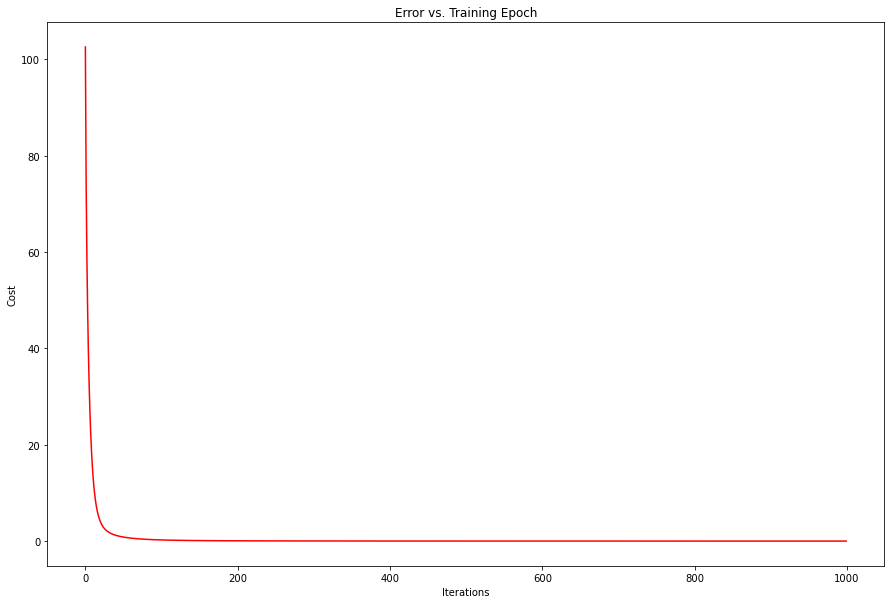

In [296]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [297]:
x2=result.iloc[1460:,:cols]

In [298]:
x2.shape

(1459, 129)

In [299]:
test = np.array(x2.values)

In [300]:
g_0.shape

(1, 129)

In [301]:
pred=test*g_0.T

In [302]:
prediction=np.array(pred)

In [303]:
pred=pd.DataFrame(data=prediction)

In [304]:
pred

0
0     11.607932
1     11.961798
2     12.071583
3     12.196722
4     12.163549
...         ...
1454  11.407424
1455  11.317197
1456  12.058276
1457  11.679169
1458  12.384650

[1459 rows x 1 columns]

ფასები რამდენადაც დასკალირებულია და მისთვის ვაგებთ მოდელს შესაბამისად ტესტზე ნამრავლის დათვლის შემდგომ მოგვიწევს ქვემოთ მოცემული ოპერაციის გაკეთება, ზემოთ მოცემულ ფასებსაც ასეთს ამიტომ ვიღებთ ნამრავლის შედეგად...

In [305]:
pred=np.exp(pred)
pred

0
0     109966.580425
1     156654.439111
2     174832.331247
3     198138.674642
4     191673.467705
...             ...
1454   89987.339524
1455   82223.550614
1456  172521.355346
1457  118086.090657
1458  239103.185223

[1459 rows x 1 columns]

In [306]:
sub=pd.read_csv('sample_submission.csv')
answer=pd.concat([sub['Id'],pred],axis=1)
answer.columns=['Id','SalePrice']
answer.to_csv('sample_submission.csv',index=False)

0.14063 არის შედეგი...

In [307]:
answer

Id      SalePrice
0     1461  109966.580425
1     1462  156654.439111
2     1463  174832.331247
3     1464  198138.674642
4     1465  191673.467705
...    ...            ...
1454  2915   89987.339524
1455  2916   82223.550614
1456  2917  172521.355346
1457  2918  118086.090657
1458  2919  239103.185223

[1459 rows x 2 columns]

# By Normal Equation

შესაძლოა ინტუიციურად მივხვდეთ კიდევაც რომ ნორმალით პოვნა არასწორ შედეგს მოგვცემს თუმცა საჭიროა მაინც ვაჩვენოთ ეს

In [308]:
new=pd.concat(frames)

In [309]:
cols = new.shape[1]
yP = new.iloc[:1460:,cols-1:cols]

In [310]:
del new['SalePrice']

In [311]:
del new['Id']

In [312]:
del new['Street']
del new['Utilities']

In [313]:
from  sklearn.preprocessing import LabelEncoder
for col in labelEnc:
    new[col]=LabelEncoder().fit_transform(new[col])
    

In [314]:
import category_encoders as ce
for col in binaryEnc+effectEnc:
    encoder=ce.BinaryEncoder(cols=[col])
    new1=encoder.fit_transform(new[col])
    new=pd.concat([new,new1],axis=1)
    del new[col]

In [315]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 128 entries, MSSubClass to PavedDrive_1
dtypes: float64(11), int64(117)
memory usage: 2.9 MB


In [316]:
new.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_3  \
0          2003       196.0          2          4  ...           1   
1          1976         0.0          3          4  ...           1   
2          2002       162.0          2          4  ...           1   
3          1970         0.0          3          4  ...           1   
4          2000       350.0          2          4  ...           1   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0                0                0                1            0   
1                0                0                1            0   
2                0                0                1            0   
3                0                1                0            0   
4                0                0                1            0   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0            1             0             1             0             1  
1            1             0             1             0             1  
2            1             0             1             0             1  
3            1             0             1             0             1  
4            1             0             1             0             1  

[5 rows x 128 columns]

In [317]:
new=(new-new.mean())/new.std()
new.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.067320    -0.127656 -0.217841     0.646073    -0.507197   1.046078   
1   -0.873466     0.567028 -0.072032    -0.063174     2.187904   0.154737   
2    0.067320     0.011281  0.137173     0.646073    -0.507197   0.980053   
3    0.302516    -0.359218 -0.078371     0.646073    -0.507197  -1.859033   
4    0.067320     0.752277  0.518814     1.355319    -0.507197   0.947040   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_3  \
0      0.896679    0.528944  -0.755664   0.376396  ...     0.32696   
1     -0.395536   -0.566919   0.668341   0.376396  ...     0.32696   
2      0.848819    0.338845  -0.755664   0.376396  ...     0.32696   
3     -0.682695   -0.566919   0.668341   0.376396  ...     0.32696   
4      0.753100    1.389978  -0.755664   0.376396  ...     0.32696   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0        -0.169982        -0.444101         0.304659    -0.225252   
1        -0.169982        -0.444101         0.304659    -0.225252   
2        -0.169982        -0.444101         0.304659    -0.225252   
3        -0.169982         2.250971        -3.281230    -0.225252   
4        -0.169982        -0.444101         0.304659    -0.225252   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1     0.211479     -0.268244      0.268244     -0.324387      0.282637  
2     0.211479     -0.268244      0.268244     -0.324387      0.282637  
3     0.211479     -0.268244      0.268244     -0.324387      0.282637  
4     0.211479     -0.268244      0.268244     -0.324387      0.282637  

[5 rows x 128 columns]

In [318]:
cols=new.shape[1]
x = new.iloc[:1460,:cols]

In [319]:
x

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.067320    -0.127656 -0.217841     0.646073    -0.507197   1.046078   
1      -0.873466     0.567028 -0.072032    -0.063174     2.187904   0.154737   
2       0.067320     0.011281  0.137173     0.646073    -0.507197   0.980053   
3       0.302516    -0.359218 -0.078371     0.646073    -0.507197  -1.859033   
4       0.067320     0.752277  0.518814     1.355319    -0.507197   0.947040   
...          ...          ...       ...          ...          ...        ...   
1455    0.067320    -0.266593 -0.285421    -0.063174    -0.507197   0.914028   
1456   -0.873466     0.798590  0.381246    -0.063174     0.391170   0.220763   
1457    0.302516    -0.081344 -0.142781     0.646073     3.086271  -1.000704   
1458   -0.873466     0.011281 -0.057197    -0.772420     0.391170  -0.703591   
1459   -0.873466     0.335467 -0.029303    -0.772420     0.391170  -0.208401   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_3  \
0         0.896679    0.528944  -0.755664   0.376396  ...     0.32696   
1        -0.395536   -0.566919   0.668341   0.376396  ...     0.32696   
2         0.848819    0.338845  -0.755664   0.376396  ...     0.32696   
3        -0.682695   -0.566919   0.668341   0.376396  ...     0.32696   
4         0.753100    1.389978  -0.755664   0.376396  ...     0.32696   
...            ...         ...        ...        ...  ...         ...   
1455      0.753100   -0.566919   0.668341   0.376396  ...     0.32696   
1456      0.178782    0.098426   0.668341   0.376396  ...     0.32696   
1457      1.040259   -0.566919  -3.603673  -2.208781  ...     0.32696   
1458      0.561660   -0.566919   0.668341   0.376396  ...     0.32696   
1459     -0.921995   -0.566919  -0.755664   0.376396  ...     0.32696   

      SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0           -0.169982        -0.444101         0.304659    -0.225252   
1           -0.169982        -0.444101         0.304659    -0.225252   
2           -0.169982        -0.444101         0.304659    -0.225252   
3           -0.169982         2.250971        -3.281230    -0.225252   
4           -0.169982        -0.444101         0.304659    -0.225252   
...               ...              ...              ...          ...   
1455        -0.169982        -0.444101         0.304659    -0.225252   
1456        -0.169982        -0.444101         0.304659    -0.225252   
1457        -0.169982        -0.444101         0.304659    -0.225252   
1458        -0.169982        -0.444101         0.304659    -0.225252   
1459        -0.169982        -0.444101         0.304659    -0.225252   

      LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0        0.211479     -0.268244      0.268244     -0.324387      0.282637  
1        0.211479     -0.268244      0.268244     -0.324387      0.282637  
2        0.211479     -0.268244      0.268244     -0.324387      0.282637  
3        0.211479     -0.268244      0.268244     -0.324387      0.282637  
4        0.211479     -0.268244      0.268244     -0.324387      0.282637  
...           ...           ...           ...           ...           ...  
1455     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1456     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1457     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1458     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1459     0.211479     -0.268244      0.268244     -0.324387      0.282637  

[1460 rows x 128 columns]

In [320]:
X = np.array(x.values)
Y = np.array(yP.values)

In [321]:
def normal(x, y):
    x = np.append(x, np.ones((x.shape[0],1)), axis=1)    
    y = y.reshape(x.shape[0],1)
    theta = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
    return theta

In [322]:
gn=normal(X,Y)
gn

array([[-1.53060104e+03],
       [-7.22608060e+01],
       [-2.85208775e+03],
       [ 3.04062443e+04],
       [ 2.61148583e+02],
       [-6.61494925e+03],
       [-4.33025070e+02],
       [ 9.34562122e+03],
       [-5.91218848e+03],
       [ 1.69199677e+03],
       [-7.83868749e+03],
       [-7.14178486e+02],
       [ 6.66600092e+02],
       [-4.28444488e+03],
       [ 1.14449741e+18],
       [-8.88898141e+01],
       [ 4.24983519e+17],
       [ 1.10426689e+18],
       [-1.10810932e+18],
       [ 2.86646309e+01],
       [ 3.20320916e+17],
       [ 3.49988060e+17],
       [ 3.78779554e+16],
       [-4.13135578e+17],
       [ 8.43476262e+02],
       [-8.15016931e+02],
       [ 6.34592213e+01],
       [-6.53743665e+02],
       [-5.54312285e+03],
       [-5.44347187e+03],
       [-7.00007620e+03],
       [ 3.10196129e+03],
       [ 1.38535217e+03],
       [-8.49954399e+02],
       [ 3.06313295e+03],
       [ 3.69467658e+02],
       [ 3.91251390e+03],
       [ 2.20330730e+03],
       [ 4.0

In [323]:
new.insert(0,"Ones",1)
new.head()

Ones  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0     1    0.067320    -0.127656 -0.217841     0.646073    -0.507197   
1     1   -0.873466     0.567028 -0.072032    -0.063174     2.187904   
2     1    0.067320     0.011281  0.137173     0.646073    -0.507197   
3     1    0.302516    -0.359218 -0.078371     0.646073    -0.507197   
4     1    0.067320     0.752277  0.518814     1.355319    -0.507197   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_3  \
0   1.046078      0.896679    0.528944  -0.755664  ...     0.32696   
1   0.154737     -0.395536   -0.566919   0.668341  ...     0.32696   
2   0.980053      0.848819    0.338845  -0.755664  ...     0.32696   
3  -1.859033     -0.682695   -0.566919   0.668341  ...     0.32696   
4   0.947040      0.753100    1.389978  -0.755664  ...     0.32696   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0        -0.169982        -0.444101         0.304659    -0.225252   
1        -0.169982        -0.444101         0.304659    -0.225252   
2        -0.169982        -0.444101         0.304659    -0.225252   
3        -0.169982         2.250971        -3.281230    -0.225252   
4        -0.169982        -0.444101         0.304659    -0.225252   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1     0.211479     -0.268244      0.268244     -0.324387      0.282637  
2     0.211479     -0.268244      0.268244     -0.324387      0.282637  
3     0.211479     -0.268244      0.268244     -0.324387      0.282637  
4     0.211479     -0.268244      0.268244     -0.324387      0.282637  

[5 rows x 129 columns]

In [324]:
gn.shape

(129, 1)

In [325]:
cols=new.shape[1]

In [326]:
x3=new.iloc[1460:,:cols]

In [327]:
x3.shape

(1459, 129)

In [328]:
test=np.array(x3.values)

In [329]:
gn=np.matrix(gn)

In [330]:
test.shape

(1459, 129)

In [331]:
gn.shape

(129, 1)

In [332]:
pred=test*gn

In [333]:
pred.shape

(1459, 1)

In [334]:
prediction=np.array(pred)

In [335]:
pred=pd.DataFrame(data=prediction)

In [336]:
pred

0
0     1.630168e+18
1    -9.422349e+17
2     3.395625e+17
3    -5.032851e+17
4    -3.261429e+18
...            ...
1454  8.547938e+17
1455  1.224120e+18
1456 -7.477542e+17
1457 -4.213627e+17
1458  4.383014e+17

[1459 rows x 1 columns]

როგორც ვხედავთ ზოგან უარყოფითი ფასია და საკმაოდ დიდებიც რეალურთან შედარებით, ასე რომ ეს მოდელი არასწორია ცხადია

# Polinomial Solution

ავაგოთ პოლინომიალური მოდელები, მახასიათებლებისა და ფასის დამოკიდებულების მხედვით ჩავამატოთ ახალი სვეტები, ქვემოთ მოცემულია რეგულარიზაციით მეთოდები თუმცა მოდელებზე აჩვენა რომ რეგულარიზაციით გაცილებით ცუდ შედეგს იძლევა, ისედაც ცოტა სვეტების რაოდენობაა და როგორც ჩანს უფრო underfit-ისკენ მიყავს რეგულარიზაციას მოდელი...ლამბდაც რაც უფრო უახლოვდება 0-ს მით უფრო უკეთეს შედეგს იძლევა, რაც კიდევ უფრო განამტკიცებს ამ მოსაზრებას...რამდენიმე მოდელი მაქვს შემუშავებული...თავიდან კორელაციის მიხედვით, რომლებსაც ბევრი ჰქონდათ, "ფასთან ნაკლები დამოკიდებულების მქონე" ამოვშალე და დავაკვირდი რა შედეგს მომცემდა...პოლინომიალურ მოდელებზე წრფივი რეგრესიითაც ვუშვებ და ვადარებ რომელი მოდელი უკეთეს შედეგს იძლევა და როგორც ვნახავთ წრფივი უფრო კარგ შედეგს დებს ტესტებზე...

In [337]:
def computeR(x, y, theta,learningRate):
    inner=np.power(((x*theta.T)- y),2)
    ans = np.sum(inner) / (2*len(x))
    reg=(learningRate/2*len(x))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return ans+reg

In [338]:
def gradientDescentR(X, y, theta,learningRate):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        tm=((((X*theta.T)-y).T)*X)*(alpha/X.shape[0])
        tm[:,1:tm.shape[1]]+=(theta[:,1:theta.shape[1]]*(learningRate*alpha/len(X)))
       
        theta=theta-tm
        
        cost[i]=computeR(X,y,theta,learningRate)
        
    
    return theta, cost

In [339]:
pol1=pol.copy()
pol1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.189655     8450            7            5       2003   
1          20     4.394449     9600            6            8       1976   
2          60     4.234107    11250            7            5       2001   
3          70     4.110874     9550            7            5       1915   
4          60     4.442651    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_3  \
0          2003    5.283204          2          4  ...           1   
1          1976    0.000000          3          4  ...           1   
2          2002    5.093750          2          4  ...           1   
3          1970    0.000000          3          4  ...           1   
4          2000    5.860786          2          4  ...           1   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0                0                0                1            0   
1                0                0                1            0   
2                0                0                1            0   
3                0                1                0            0   
4                0                0                1            0   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0            1             0             1             0             1  
1            1             0             1             0             1  
2            1             0             1             0             1  
3            1             0             1             0             1  
4            1             0             1             0             1  

[5 rows x 128 columns]

In [340]:
pol1.insert(0,'SalePrice', data['SalePrice'])


In [341]:
pol1.head()

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     208500          60     4.189655     8450            7            5   
1     181500          20     4.394449     9600            6            8   
2     223500          60     4.234107    11250            7            5   
3     140000          70     4.110874     9550            7            5   
4     250000          60     4.442651    14260            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_3  \
0       2003          2003    5.283204          2  ...           1   
1       1976          1976    0.000000          3  ...           1   
2       2001          2002    5.093750          2  ...           1   
3       1915          1970    0.000000          3  ...           1   
4       2000          2000    5.860786          2  ...           1   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0                0                0                1            0   
1                0                0                1            0   
2                0                0                1            0   
3                0                1                0            0   
4                0                0                1            0   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0            1             0             1             0             1  
1            1             0             1             0             1  
2            1             0             1             0             1  
3            1             0             1             0             1  
4            1             0             1             0             1  

[5 rows x 129 columns]

კორელაციის საჩვენებლად...

<AxesSubplot:>

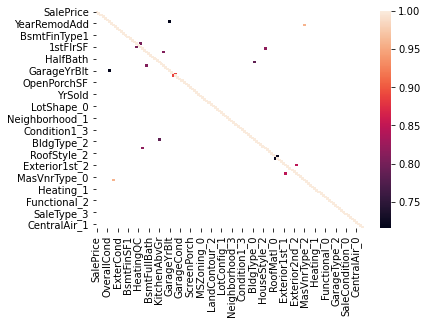

In [342]:
c=pol1.corr()
s.heatmap(c[c>0.7])

In [343]:
del pol1['SalePrice']

In [344]:
corr=pol1.corr()
round(corr,2)


rows,columns=np.where(corr>0.7)

for i in range (len(rows)):
    if not rows[i]==columns[i]:
        print(rows[i],columns[i])
        print(pol1.columns[rows[i]],pol1.columns[columns[i]])

5 34
YearBuilt GarageYrBlt
7 99
MasVnrArea MasVnrType_2
18 20
TotalBsmtSF 1stFlrSF
20 18
1stFlrSF TotalBsmtSF
21 80
2ndFlrSF HouseStyle_3
23 31
GrLivArea TotRmsAbvGrd
29 75
KitchenAbvGr BldgType_1
31 23
TotRmsAbvGrd GrLivArea
34 5
GarageYrBlt YearBuilt
36 37
GarageCars GarageArea
37 36
GarageArea GarageCars
75 29
BldgType_1 KitchenAbvGr
80 21
HouseStyle_3 2ndFlrSF
85 86
RoofMatl_1 RoofMatl_2
86 85
RoofMatl_2 RoofMatl_1
90 95
Exterior1st_2 Exterior2nd_3
95 90
Exterior2nd_3 Exterior1st_2
99 7
MasVnrType_2 MasVnrArea


დავაბეჭდინე მაღალი კორელაციის მქონე სვეტები და ერთ-ერთი წავშალე,რომელიც ჩემი გადმოსახედიდან, ცხადია ნახაზებისა და მონაცემებზე დაყრდნობით, რასაც გრაფიკები აჩვენებს, უფრო ნაკლებ მნიშვნელოვანი იყო ფასის დასადგენად

In [345]:
del pol1['GarageYrBlt']
del pol1['2ndFlrSF']
del pol1["Exterior2nd_3"]
del pol1["MasVnrType_2"]
del pol1["TotalBsmtSF"]
del pol1["GarageArea"]
del pol1["BldgType_1"]      
del pol1["RoofMatl_1"]  


<AxesSubplot:>

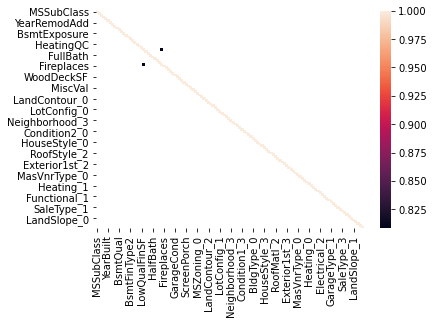

In [346]:
c=pol1.corr()
s.heatmap(c[c>0.7])

In [347]:
pol1=(pol1-pol1.mean())/pol1.std()
pol1.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.067320     0.023866 -0.217841     0.646073    -0.507197   1.046078   
1   -0.873466     0.660094 -0.072032    -0.063174     2.187904   0.154737   
2    0.067320     0.161963  0.137173     0.646073    -0.507197   0.980053   
3    0.302516    -0.220880 -0.078371     0.646073    -0.507197  -1.859033   
4    0.067320     0.809842  0.518814     1.355319    -0.507197   0.947040   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_3  \
0      0.896679    1.222460  -0.755664   0.376396  ...     0.32696   
1     -0.395536   -0.793325   0.668341   0.376396  ...     0.32696   
2      0.848819    1.150175  -0.755664   0.376396  ...     0.32696   
3     -0.682695   -0.793325   0.668341   0.376396  ...     0.32696   
4      0.753100    1.442835  -0.755664   0.376396  ...     0.32696   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0        -0.169982        -0.444101         0.304659    -0.225252   
1        -0.169982        -0.444101         0.304659    -0.225252   
2        -0.169982        -0.444101         0.304659    -0.225252   
3        -0.169982         2.250971        -3.281230    -0.225252   
4        -0.169982        -0.444101         0.304659    -0.225252   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1     0.211479     -0.268244      0.268244     -0.324387      0.282637  
2     0.211479     -0.268244      0.268244     -0.324387      0.282637  
3     0.211479     -0.268244      0.268244     -0.324387      0.282637  
4     0.211479     -0.268244      0.268244     -0.324387      0.282637  

[5 rows x 120 columns]

In [348]:
pol1.insert(0,"Ones",1)

In [349]:
pol1.head()

Ones  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0     1    0.067320     0.023866 -0.217841     0.646073    -0.507197   
1     1   -0.873466     0.660094 -0.072032    -0.063174     2.187904   
2     1    0.067320     0.161963  0.137173     0.646073    -0.507197   
3     1    0.302516    -0.220880 -0.078371     0.646073    -0.507197   
4     1    0.067320     0.809842  0.518814     1.355319    -0.507197   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_3  \
0   1.046078      0.896679    1.222460  -0.755664  ...     0.32696   
1   0.154737     -0.395536   -0.793325   0.668341  ...     0.32696   
2   0.980053      0.848819    1.150175  -0.755664  ...     0.32696   
3  -1.859033     -0.682695   -0.793325   0.668341  ...     0.32696   
4   0.947040      0.753100    1.442835  -0.755664  ...     0.32696   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0        -0.169982        -0.444101         0.304659    -0.225252   
1        -0.169982        -0.444101         0.304659    -0.225252   
2        -0.169982        -0.444101         0.304659    -0.225252   
3        -0.169982         2.250971        -3.281230    -0.225252   
4        -0.169982        -0.444101         0.304659    -0.225252   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0     0.211479     -0.268244      0.268244     -0.324387      0.282637  
1     0.211479     -0.268244      0.268244     -0.324387      0.282637  
2     0.211479     -0.268244      0.268244     -0.324387      0.282637  
3     0.211479     -0.268244      0.268244     -0.324387      0.282637  
4     0.211479     -0.268244      0.268244     -0.324387      0.282637  

[5 rows x 121 columns]

In [350]:
cols=pol1.shape[1]
x = pol1.iloc[:1460,:cols]

In [351]:
m=np.array(x.values)
n=np.array(y.values)

In [352]:
theta = np.matrix(np.array([0]*121))

In [353]:
alpha=0.1
iters=1000

In [354]:
g, cost = gradientDescent(m, n, theta,alpha,iters)
g



matrix([[ 1.20182728e+01, -1.03310802e-02,  1.13209257e-02,
          1.46009605e-02,  8.00809341e-02,  4.97614009e-02,
          4.03569607e-02,  1.02047812e-02,  9.75041446e-03,
         -5.36975605e-03,  6.64855179e-03, -9.20664721e-03,
          2.56107725e-03, -4.01348503e-03, -2.62810338e-03,
          6.94774435e-02,  9.68003046e-03,  2.90346163e-02,
          3.81661327e-02, -1.06132598e-02,  4.70358625e-04,
         -3.03006100e-04,  1.32416693e-01,  1.41906807e-02,
         -4.70799860e-04,  5.20967993e-03,  5.81806123e-03,
         -2.67440006e-03, -1.17615073e-02, -1.34240859e-02,
          1.34620642e-02,  2.00312406e-02, -1.70123540e-03,
         -7.38802401e-03,  3.89556839e-02, -7.11123617e-04,
          7.66094941e-03,  1.08481135e-02,  1.82292268e-03,
          9.92216083e-03,  3.85352293e-03,  1.44998009e-02,
          6.02162836e-04,  2.15391123e-04, -2.09597993e-03,
         -5.17166272e-03, -1.65822454e-02, -9.12133955e-02,
         -6.62533979e-02,  1.63403044e-0

In [355]:
cost

array([5.79927724e+01, 4.67355271e+01, 3.77471563e+01, 3.05378748e+01,
       2.47407937e+01, 2.00705448e+01, 1.63022512e+01, 1.32575711e+01,
       1.07945022e+01, 8.79964564e+00, 7.18223312e+00, 5.86947035e+00,
       4.80288142e+00, 3.93542485e+00, 3.22920941e+00, 2.65367896e+00,
       2.18416641e+00, 1.80073910e+00, 1.48727503e+00, 1.23072275e+00,
       1.02050743e+00, 8.48053709e-01, 7.06401857e-01, 5.89898738e-01,
       4.93948741e-01, 4.14812866e-01, 3.49446512e-01, 2.95368416e-01,
       2.50554676e-01, 2.13352996e-01, 1.82413236e-01, 1.56631137e-01,
       1.35102679e-01, 1.17087047e-01, 1.01976549e-01, 8.92721710e-02,
       7.85636972e-02, 6.95135291e-02, 6.18435060e-02, 5.53241625e-02,
       4.97659661e-02, 4.50121623e-02, 4.09329300e-02, 3.74206018e-02,
       3.43857517e-02, 3.17539909e-02, 2.94633409e-02, 2.74620768e-02,
       2.57069573e-02, 2.41617676e-02, 2.27961218e-02, 2.15844746e-02,
       2.05053078e-02, 1.95404568e-02, 1.86745557e-02, 1.78945763e-02,
      

In [356]:
computeCost(m,n,g)

0.0061103816651220146

In [357]:
x2=pol1.iloc[1460:,:cols]

In [358]:
test=np.array(x2.values)

In [359]:
g.shape

(1, 121)

In [360]:
test.shape

(1459, 121)

In [361]:
pred=test*g.T

In [362]:
prediction=np.array(pred)


In [363]:
pred=pd.DataFrame(data=prediction)

In [364]:
pred

0
0     11.572047
1     11.959903
2     12.071737
3     12.187871
4     12.164701
...         ...
1454  11.415059
1455  11.315778
1456  12.054336
1457  11.677534
1458  12.388507

[1459 rows x 1 columns]

In [365]:
pred=np.exp(pred)
pred

0
0     106090.409426
1     156357.932422
2     174859.309604
3     196392.561061
4     191894.416958
...             ...
1454   90676.984461
1455   82106.922696
1456  171842.952127
1457  117893.202426
1458  240027.022558

[1459 rows x 1 columns]

In [366]:
sub=pd.read_csv('sample_submission.csv')
answer=pd.concat([sub['Id'],pred],axis=1)
answer.columns=['Id','SalePrice']
answer.to_csv('sample_submission.csv',index=False)

0.13936 ტესტებზე...მცერედით გაუმჯობესდა...

In [367]:
answer

Id      SalePrice
0     1461  106090.409426
1     1462  156357.932422
2     1463  174859.309604
3     1464  196392.561061
4     1465  191894.416958
...    ...            ...
1454  2915   90676.984461
1455  2916   82106.922696
1456  2917  171842.952127
1457  2918  117893.202426
1458  2919  240027.022558

[1459 rows x 2 columns]

ვნახოთ ახალი მოდელი...

In [368]:
pol3=pol.copy()
pol3.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.189655     8450            7            5       2003   
1          20     4.394449     9600            6            8       1976   
2          60     4.234107    11250            7            5       2001   
3          70     4.110874     9550            7            5       1915   
4          60     4.442651    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_3  \
0          2003    5.283204          2          4  ...           1   
1          1976    0.000000          3          4  ...           1   
2          2002    5.093750          2          4  ...           1   
3          1970    0.000000          3          4  ...           1   
4          2000    5.860786          2          4  ...           1   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0                0                0                1            0   
1                0                0                1            0   
2                0                0                1            0   
3                0                1                0            0   
4                0                0                1            0   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0            1             0             1             0             1  
1            1             0             1             0             1  
2            1             0             1             0             1  
3            1             0             1             0             1  
4            1             0             1             0             1  

[5 rows x 128 columns]

In [369]:
pol3.insert(0,'SalePrice',data['SalePrice'])

In [370]:
pol3.head()

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     208500          60     4.189655     8450            7            5   
1     181500          20     4.394449     9600            6            8   
2     223500          60     4.234107    11250            7            5   
3     140000          70     4.110874     9550            7            5   
4     250000          60     4.442651    14260            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_3  \
0       2003          2003    5.283204          2  ...           1   
1       1976          1976    0.000000          3  ...           1   
2       2001          2002    5.093750          2  ...           1   
3       1915          1970    0.000000          3  ...           1   
4       2000          2000    5.860786          2  ...           1   

   SaleCondition_0  SaleCondition_1  SaleCondition_2  LandSlope_0  \
0                0                0                1            0   
1                0                0                1            0   
2                0                0                1            0   
3                0                1                0            0   
4                0                0                1            0   

   LandSlope_1  CentralAir_0  CentralAir_1  PavedDrive_0  PavedDrive_1  
0            1             0             1             0             1  
1            1             0             1             0             1  
2            1             0             1             0             1  
3            1             0             1             0             1  
4            1             0             1             0             1  

[5 rows x 129 columns]

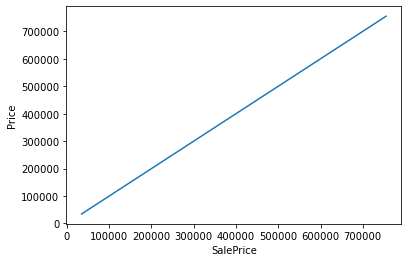

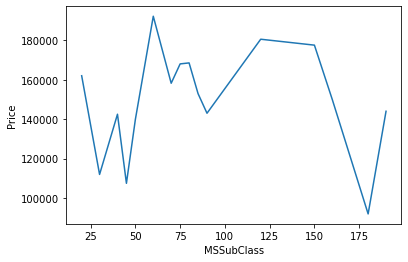

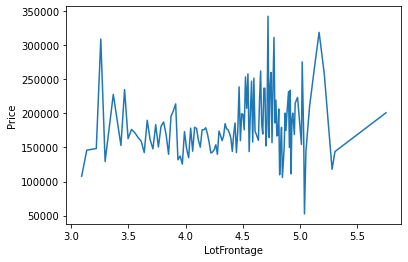

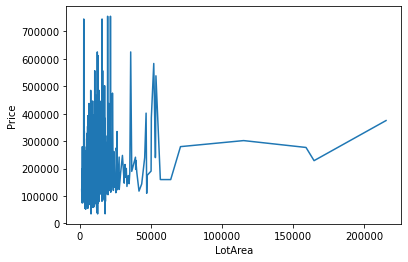

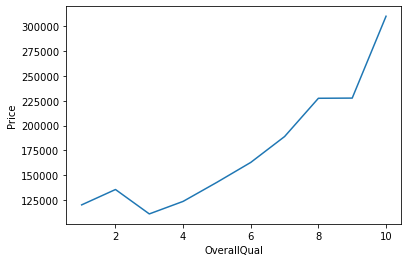

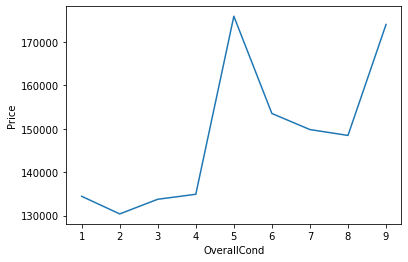

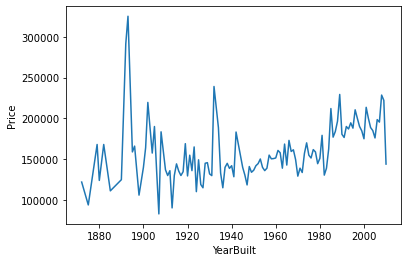

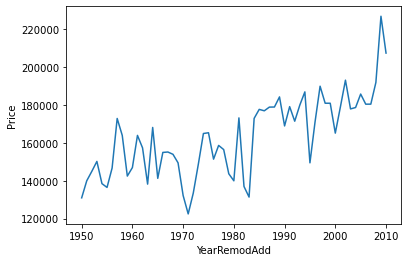

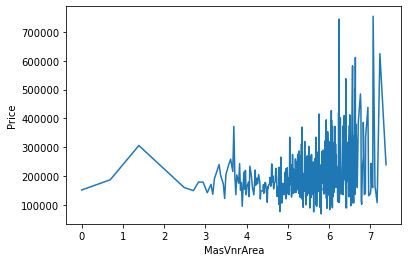

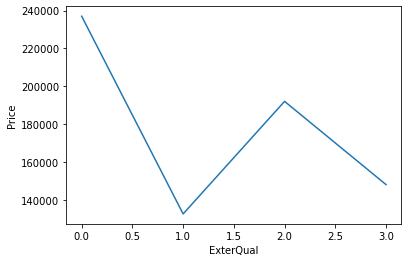

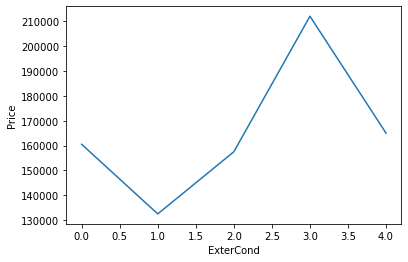

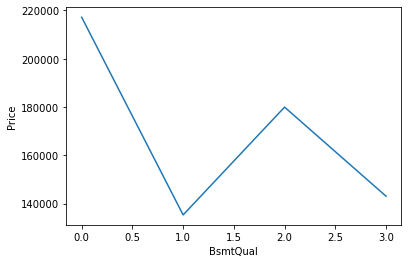

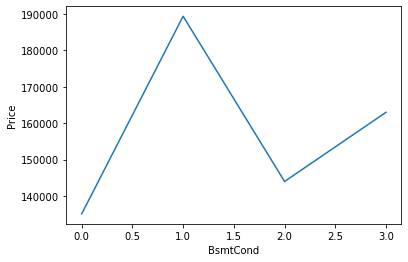

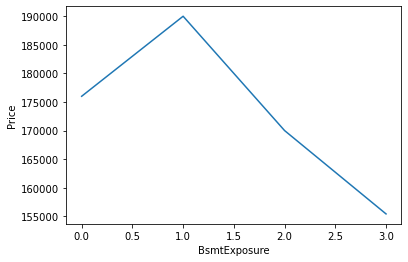

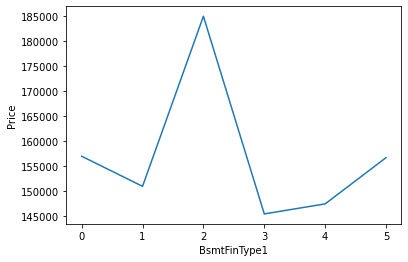

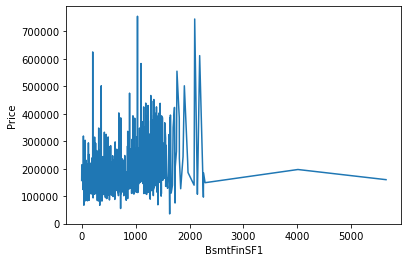

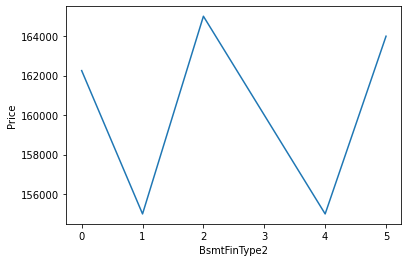

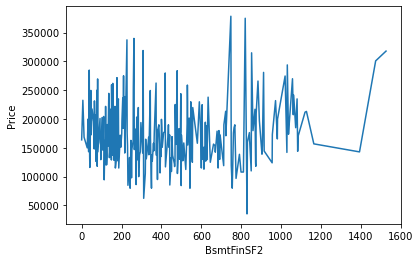

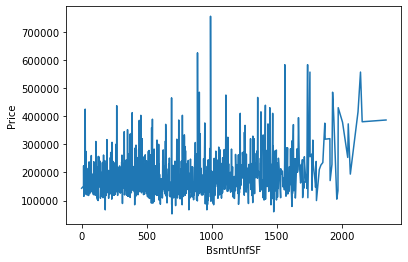

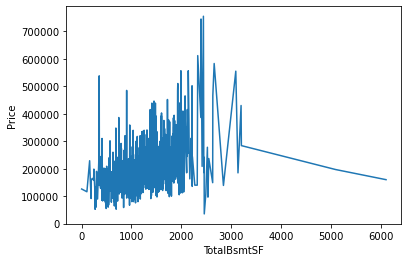

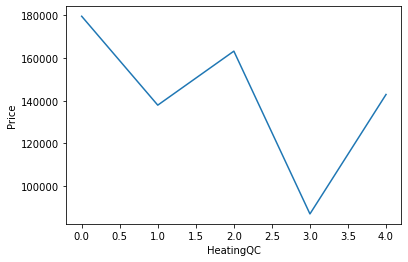

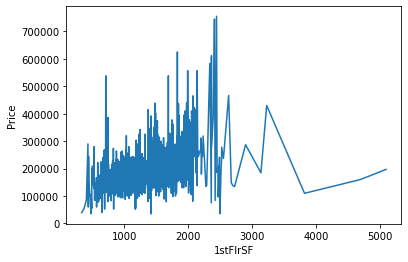

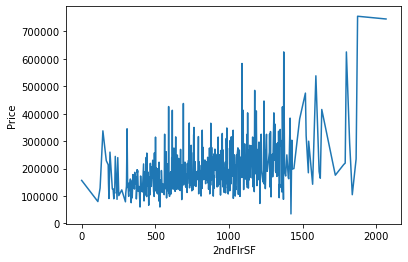

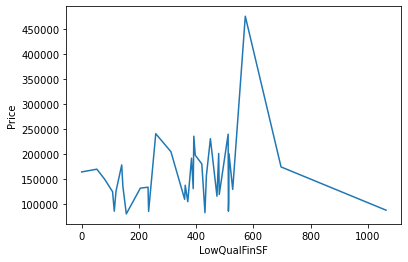

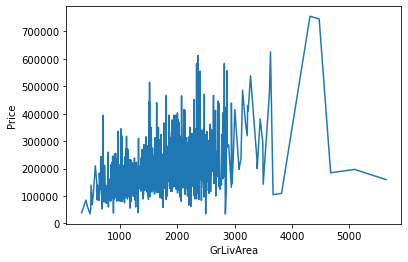

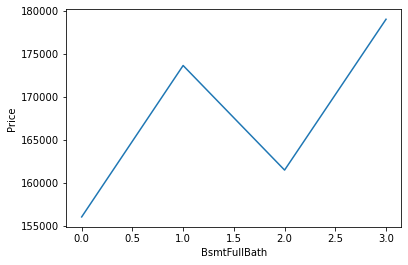

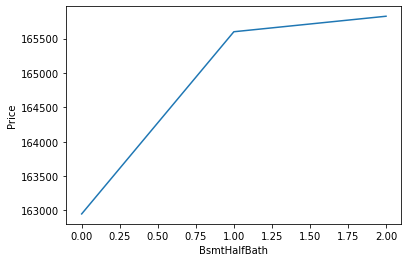

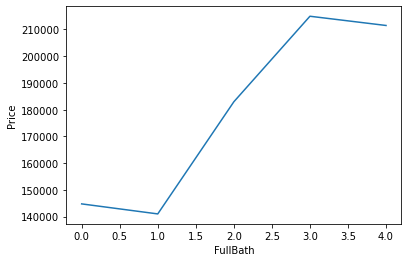

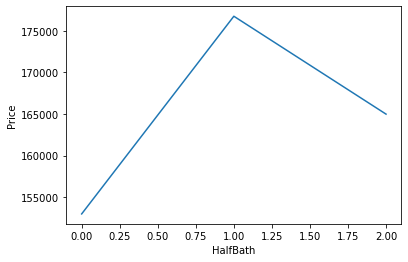

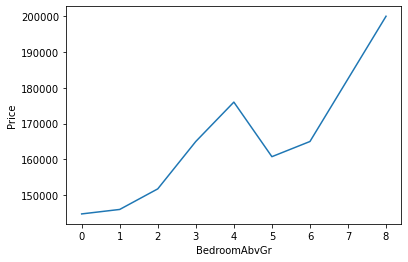

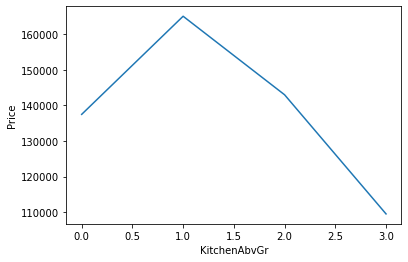

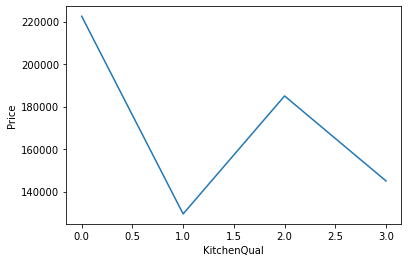

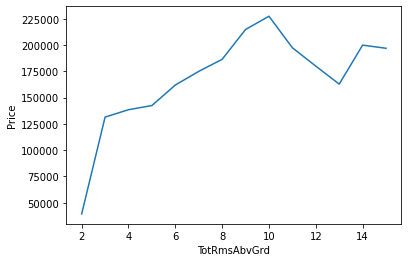

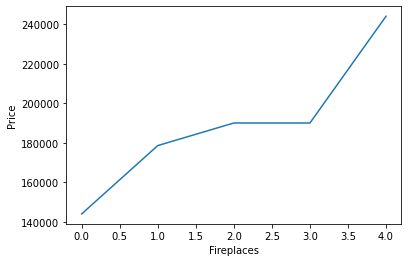

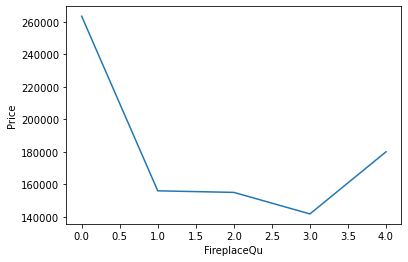

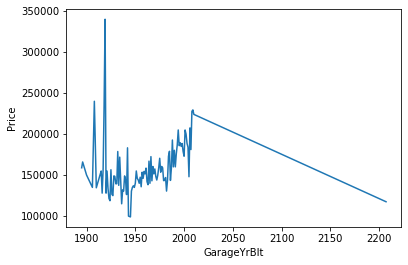

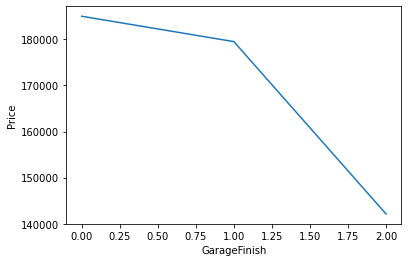

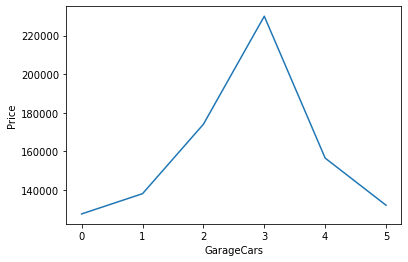

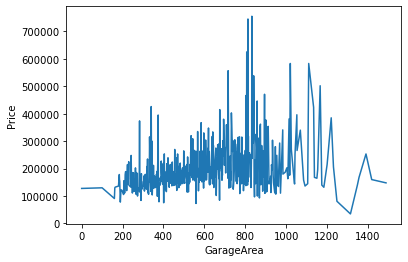

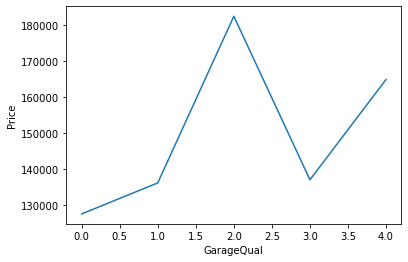

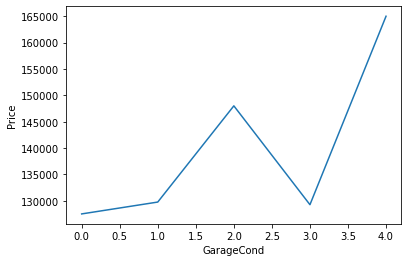

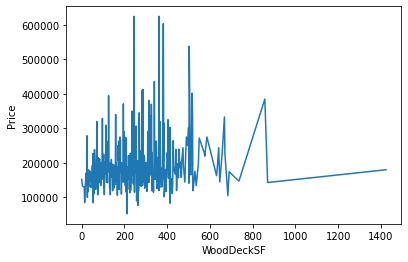

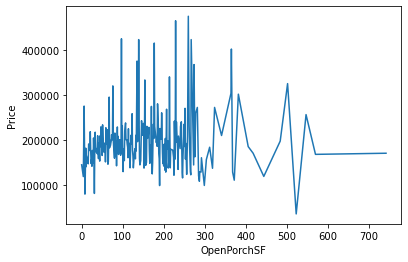

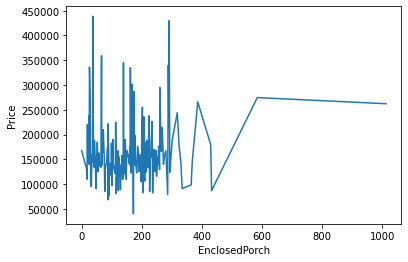

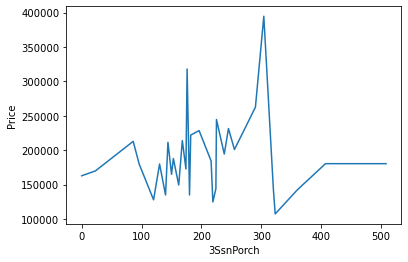

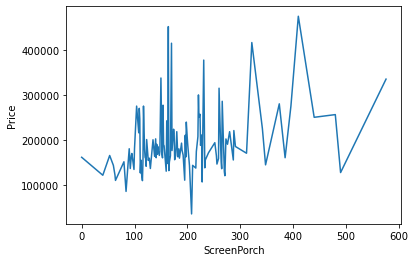

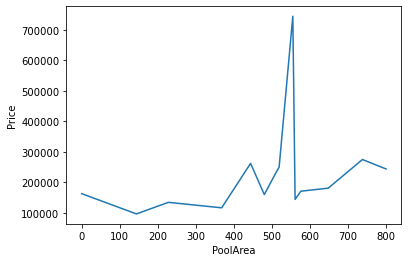

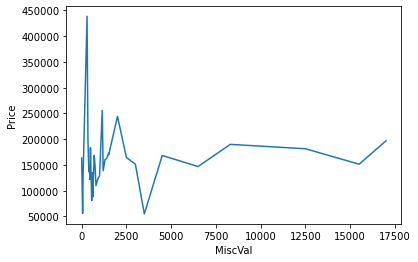

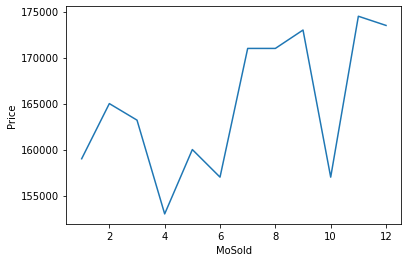

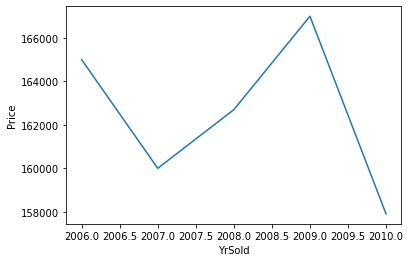

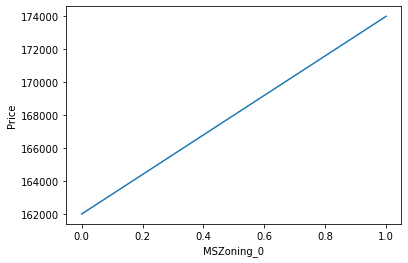

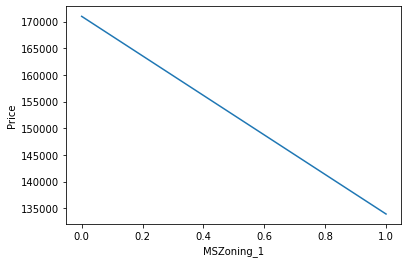

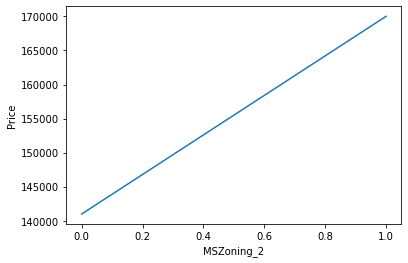

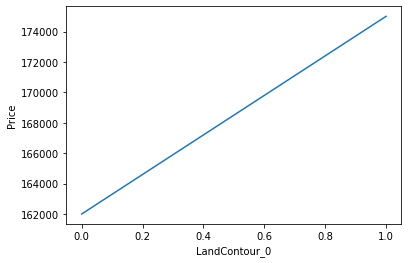

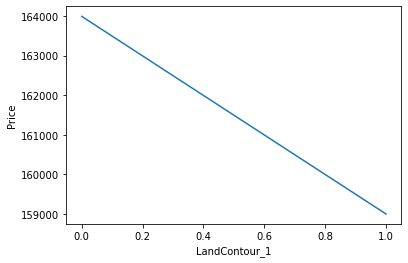

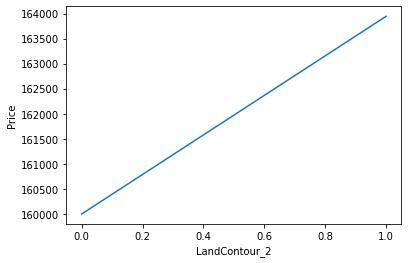

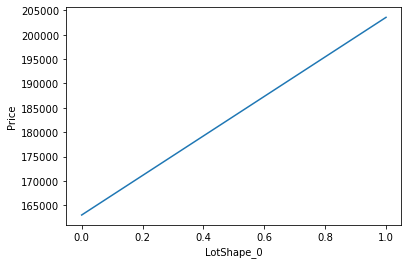

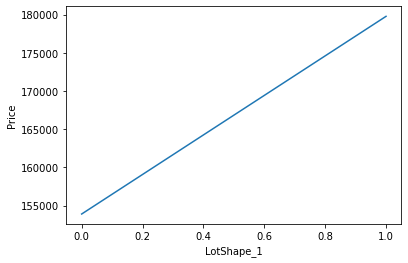

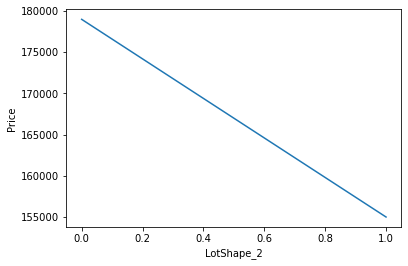

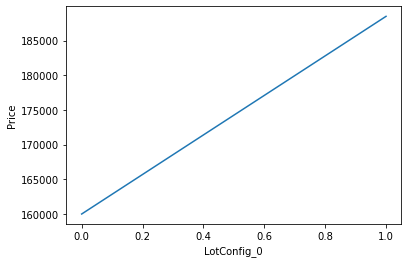

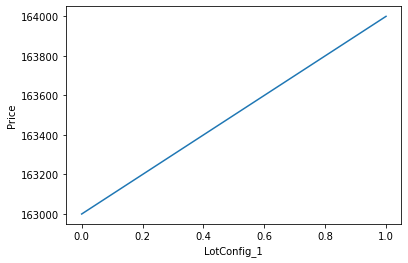

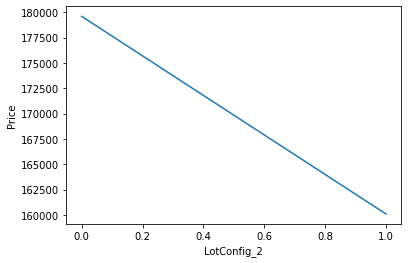

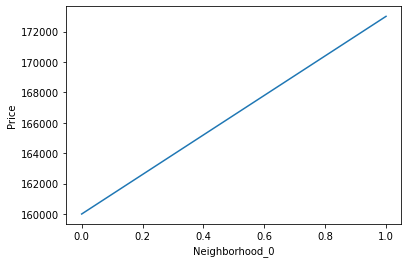

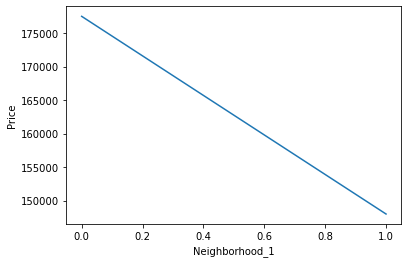

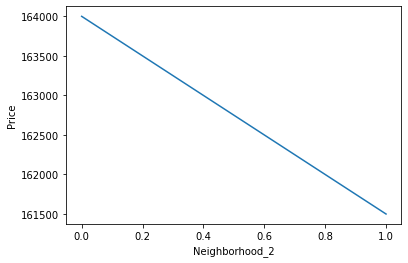

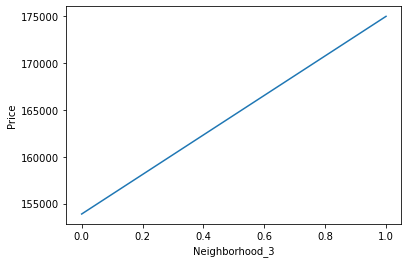

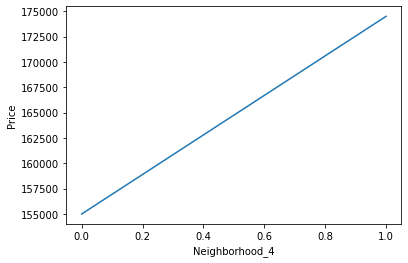

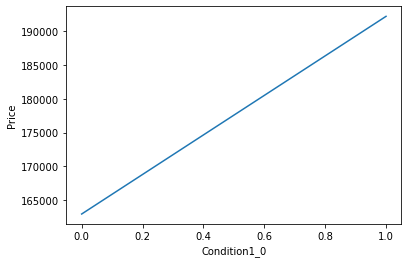

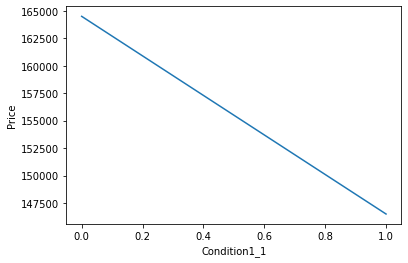

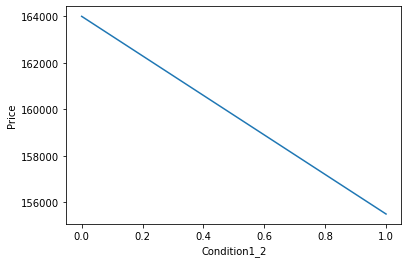

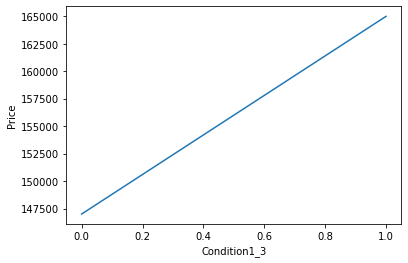

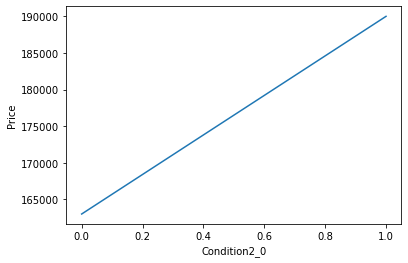

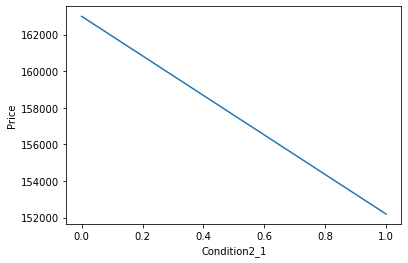

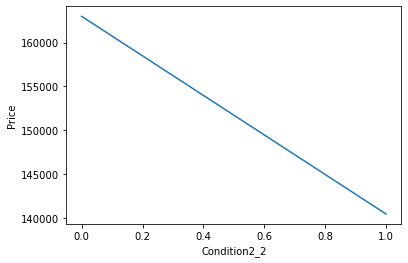

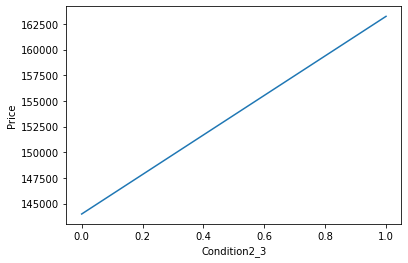

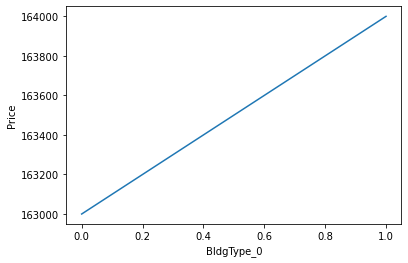

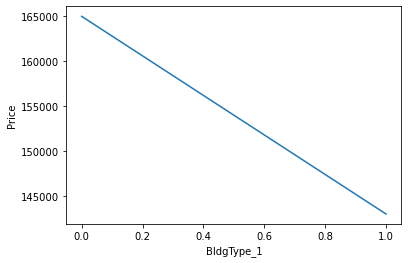

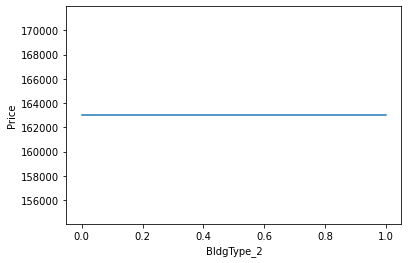

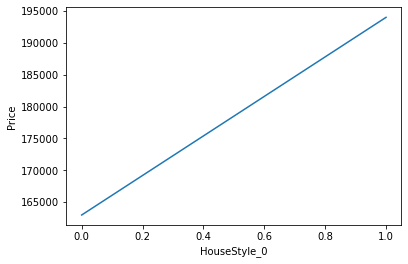

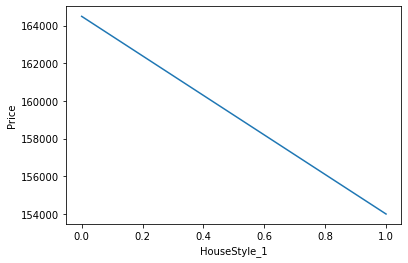

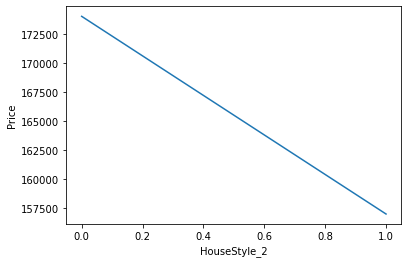

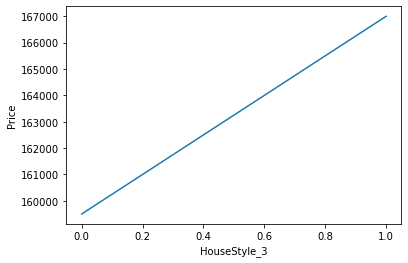

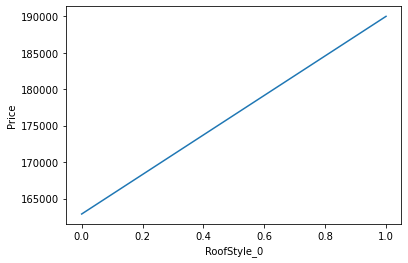

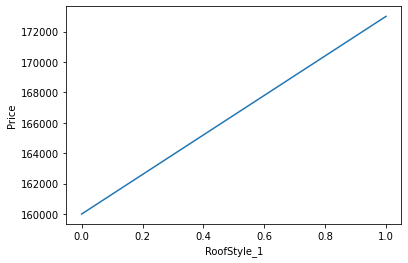

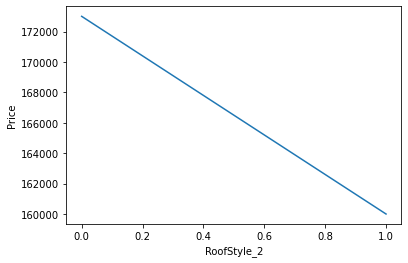

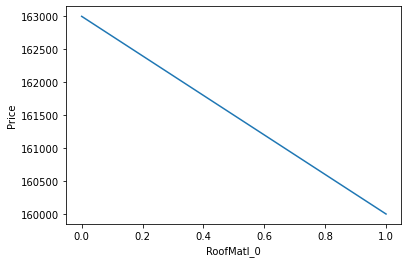

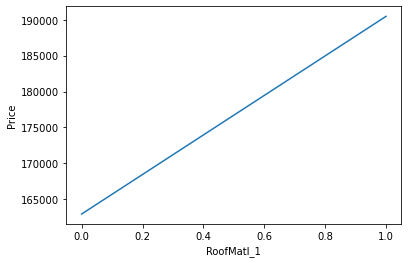

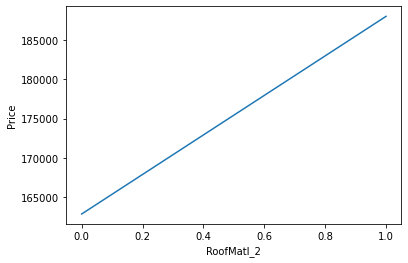

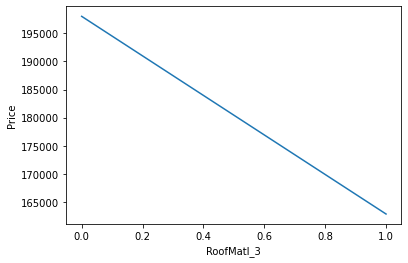

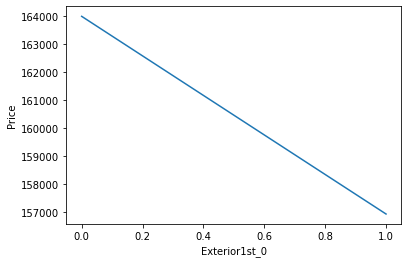

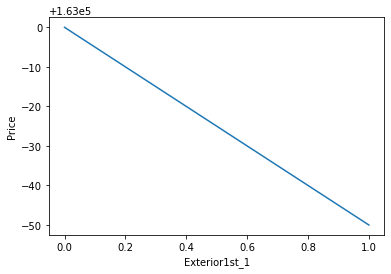

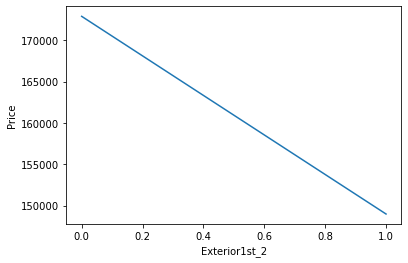

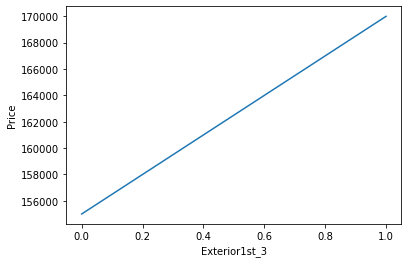

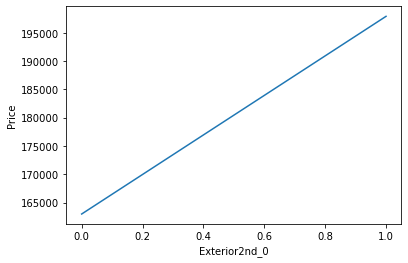

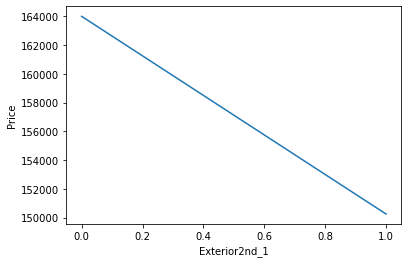

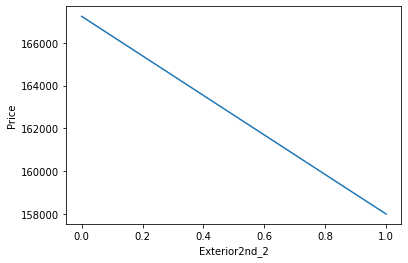

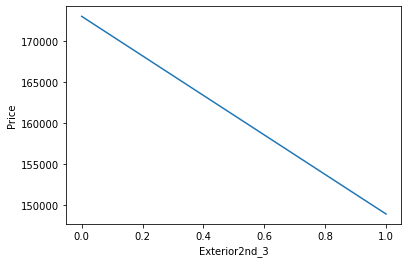

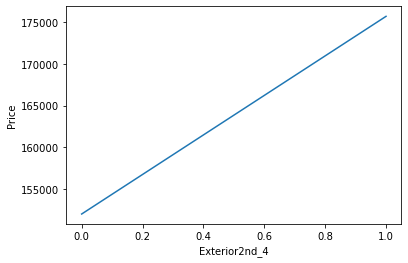

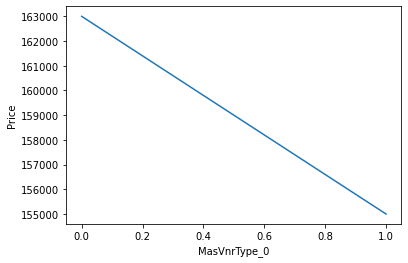

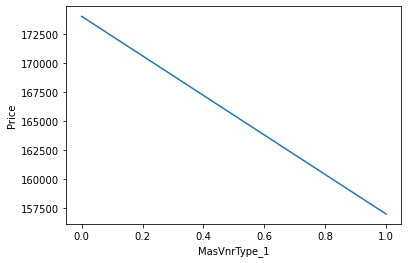

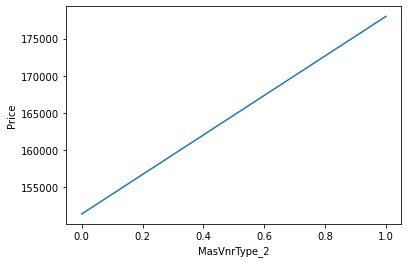

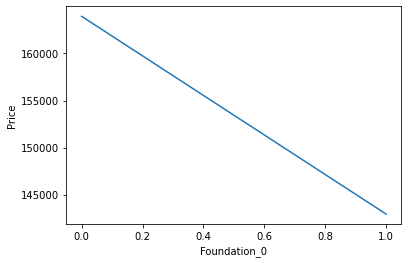

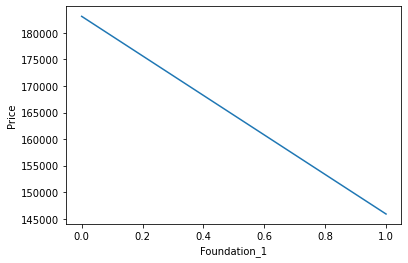

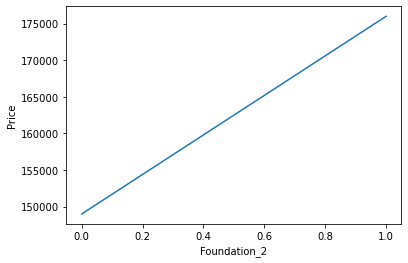

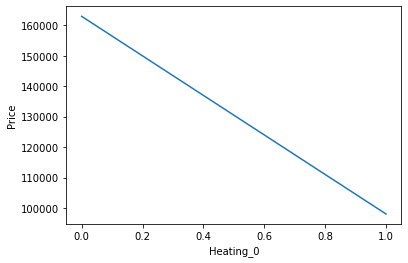

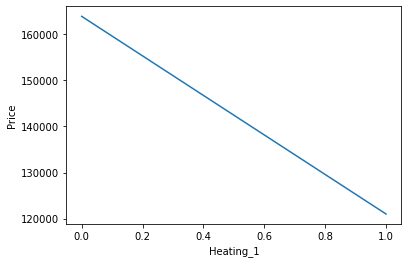

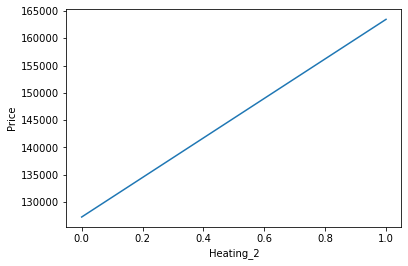

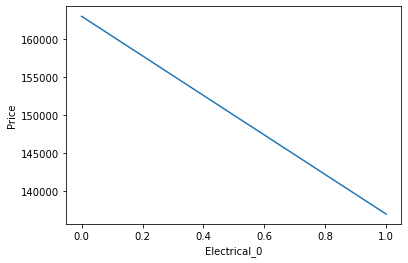

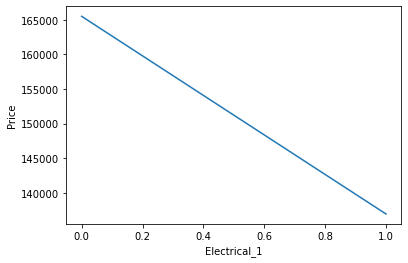

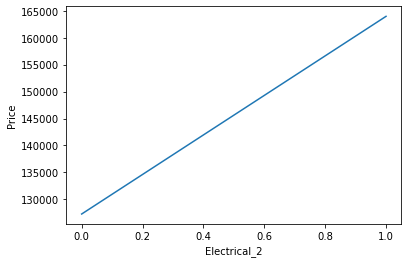

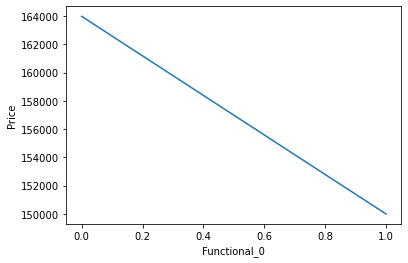

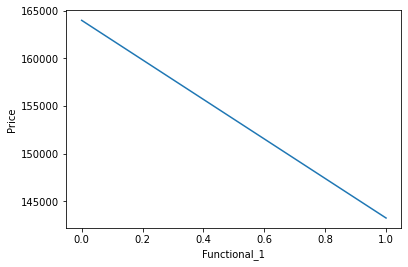

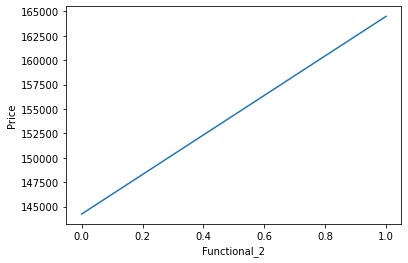

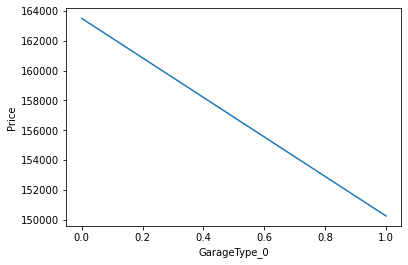

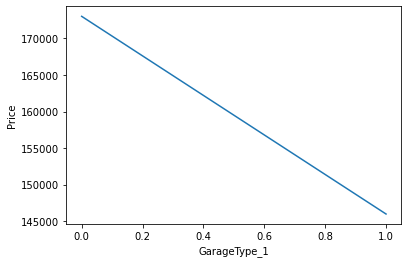

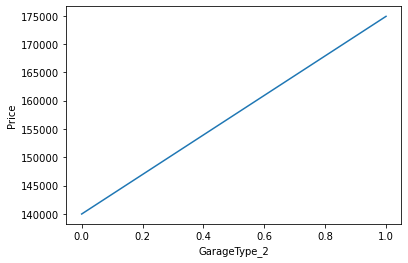

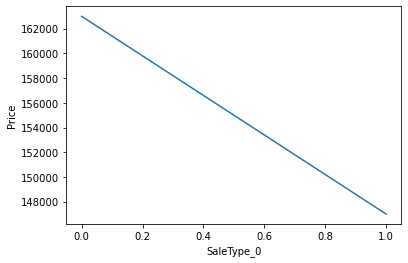

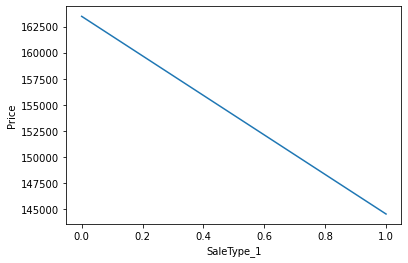

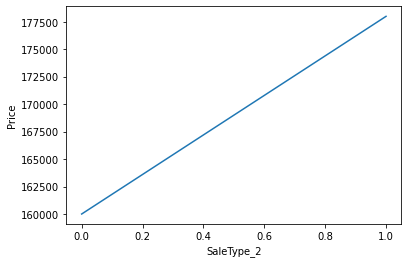

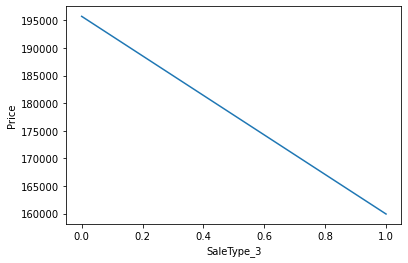

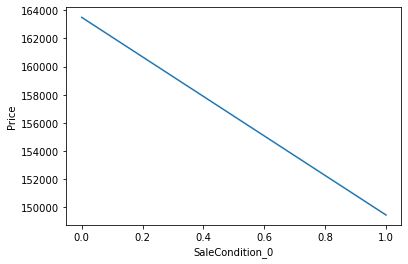

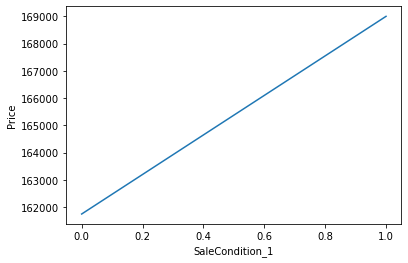

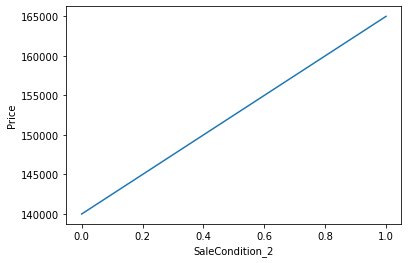

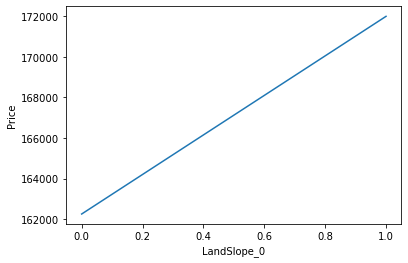

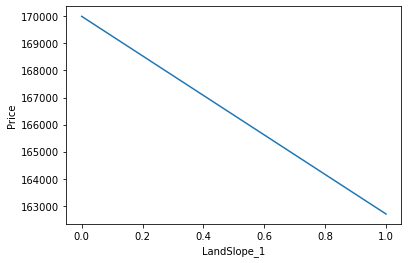

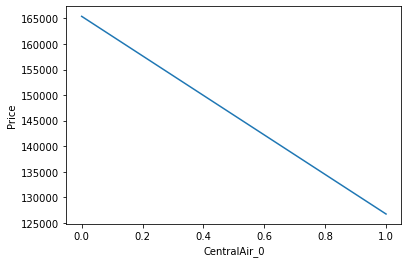

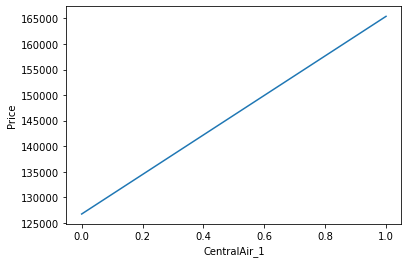

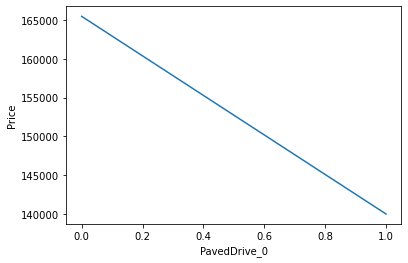

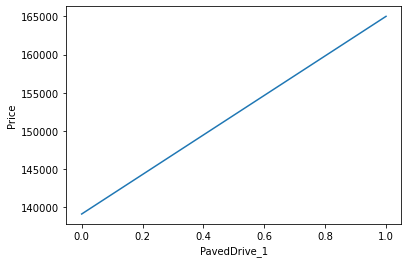

In [371]:
for i in pol3.columns:
    dataCopy=pol3.copy()
    dataCopy.groupby(i)['SalePrice'].median().plot()
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

In [372]:
pol3['new']=np.power(pol3['BsmtHalfBath'],0.2)

In [373]:
pol3['new1']=np.power(pol3['BedroomAbvGr'],4)

In [374]:
pol3['new2']=np.power(pol3['TotRmsAbvGrd'],0.1)

In [375]:
pol3['new3']=np.power(pol3['Fireplaces'],0.7)

In [376]:
pol3['new4']=np.power(pol3['OverallQual'],2)

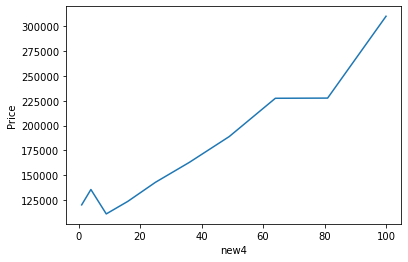

In [377]:
dataCopy=pol3.copy()
dataCopy.groupby('new4')['SalePrice'].median().plot()
plt.xlabel('new4')
plt.ylabel('Price')
plt.show()

მსგავს ნახაზებს ვაგებდი სხვა მონაცემებზეც დამოკიდებულებისთვის,ერთის მაქვს დატოვებული უბრალოდ საჩვენებლად, ზევითაც ყველაზე იმიტომ მაქვს დახაზული დამოკიდებულების მიხედვით რომ ჩავამატო ახალი სვეტი...

In [378]:
pol3['new5']= pol3['GrLivArea'] / pol3['LotArea']

In [379]:
pol3['new6']=pol3['GrLivArea'] / pol3['TotRmsAbvGrd']

In [380]:
pol3['new7']=pol3['OverallQual'] * pol3['OverallCond']

In [381]:
pol3['new8']=pol3['LowQualFinSF'] / pol3['GrLivArea']

In [382]:
pol3.head()

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     208500          60     4.189655     8450            7            5   
1     181500          20     4.394449     9600            6            8   
2     223500          60     4.234107    11250            7            5   
3     140000          70     4.110874     9550            7            5   
4     250000          60     4.442651    14260            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  PavedDrive_1  new  \
0       2003          2003    5.283204          2  ...             1  0.0   
1       1976          1976    0.000000          3  ...             1  1.0   
2       2001          2002    5.093750          2  ...             1  0.0   
3       1915          1970    0.000000          3  ...             1  0.0   
4       2000          2000    5.860786          2  ...             1  0.0   

   new1      new2  new3  new4      new5        new6  new7  new8  
0    81  1.231144   0.0    49  0.202367  213.750000    35   0.0  
1    81  1.196231   1.0    36  0.131458  210.333333    48   0.0  
2    81  1.196231   1.0    49  0.158756  297.666667    35   0.0  
3    81  1.214814   1.0    49  0.179791  245.285714    35   0.0  
4   256  1.245731   1.0    64  0.154137  244.222222    40   0.0  

[5 rows x 138 columns]

გზადაგზა ვიკვლევ მონაცემებს და ვამოწმებ ხომ სწორად ჩაემატა...

In [383]:
pol3['new8'].unique()

array([0.        , 0.30612245, 0.336173  , 0.31034483, 0.38205499,
       0.15853659, 0.08695652, 0.12596401, 0.16644235, 0.29635258,
       0.19160584, 0.2885906 , 0.16684492, 0.15169367, 0.29801325,
       0.06541292, 0.06666667, 0.02284483, 0.1829653 , 0.21569507,
       0.06420546, 0.33771353, 0.12881246, 0.15521711, 0.08693808,
       0.15029354, 0.23644677, 0.44762305, 0.28829431, 0.29459459,
       0.14599775, 0.14391144, 0.06775408, 0.3539868 , 0.2962963 ,
       0.07681941, 0.24260355, 0.08235294, 0.31824611])

In [384]:
pol3.head()

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     208500          60     4.189655     8450            7            5   
1     181500          20     4.394449     9600            6            8   
2     223500          60     4.234107    11250            7            5   
3     140000          70     4.110874     9550            7            5   
4     250000          60     4.442651    14260            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  PavedDrive_1  new  \
0       2003          2003    5.283204          2  ...             1  0.0   
1       1976          1976    0.000000          3  ...             1  1.0   
2       2001          2002    5.093750          2  ...             1  0.0   
3       1915          1970    0.000000          3  ...             1  0.0   
4       2000          2000    5.860786          2  ...             1  0.0   

   new1      new2  new3  new4      new5        new6  new7  new8  
0    81  1.231144   0.0    49  0.202367  213.750000    35   0.0  
1    81  1.196231   1.0    36  0.131458  210.333333    48   0.0  
2    81  1.196231   1.0    49  0.158756  297.666667    35   0.0  
3    81  1.214814   1.0    49  0.179791  245.285714    35   0.0  
4   256  1.245731   1.0    64  0.154137  244.222222    40   0.0  

[5 rows x 138 columns]

In [385]:
del pol3['SalePrice']

In [386]:
pol4=pol3.copy()

In [387]:
pol3=(pol3-pol3.mean())/pol3.std()
pol3.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.067320     0.023866 -0.217841     0.646073    -0.507197   1.046078   
1   -0.873466     0.660094 -0.072032    -0.063174     2.187904   0.154737   
2    0.067320     0.161963  0.137173     0.646073    -0.507197   0.980053   
3    0.302516    -0.220880 -0.078371     0.646073    -0.507197  -1.859033   
4    0.067320     0.809842  0.518814     1.355319    -0.507197   0.947040   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  PavedDrive_1  \
0      0.896679    1.222460  -0.755664   0.376396  ...      0.282637   
1     -0.395536   -0.793325   0.668341   0.376396  ...      0.282637   
2      0.848819    1.150175  -0.755664   0.376396  ...      0.282637   
3     -0.682695   -0.793325   0.668341   0.376396  ...      0.282637   
4      0.753100    1.442835  -0.755664   0.376396  ...      0.282637   

        new      new1      new2      new3      new4      new5      new6  \
0 -0.252429 -0.145639  1.013695 -0.979845  0.558552  0.170395 -0.382879   
1  3.943825 -0.145639 -0.193116  0.753443 -0.172247 -0.444392 -0.457060   
2 -0.252429 -0.145639 -0.193116  0.753443  0.558552 -0.207721  1.439068   
3 -0.252429 -0.145639  0.449219  0.753443  0.558552 -0.025344  0.301805   
4 -0.252429  0.940052  1.517893  0.753443  1.401781 -0.247761  0.278715   

       new7      new8  
0  0.137612 -0.103048  
1  1.552778 -0.103048  
2  0.137612 -0.103048  
3  0.137612 -0.103048  
4  0.681906 -0.103048  

[5 rows x 137 columns]

In [388]:
pol3.insert(0,"Ones",1)

In [389]:
pol3.head()

Ones  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0     1    0.067320     0.023866 -0.217841     0.646073    -0.507197   
1     1   -0.873466     0.660094 -0.072032    -0.063174     2.187904   
2     1    0.067320     0.161963  0.137173     0.646073    -0.507197   
3     1    0.302516    -0.220880 -0.078371     0.646073    -0.507197   
4     1    0.067320     0.809842  0.518814     1.355319    -0.507197   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  PavedDrive_1  \
0   1.046078      0.896679    1.222460  -0.755664  ...      0.282637   
1   0.154737     -0.395536   -0.793325   0.668341  ...      0.282637   
2   0.980053      0.848819    1.150175  -0.755664  ...      0.282637   
3  -1.859033     -0.682695   -0.793325   0.668341  ...      0.282637   
4   0.947040      0.753100    1.442835  -0.755664  ...      0.282637   

        new      new1      new2      new3      new4      new5      new6  \
0 -0.252429 -0.145639  1.013695 -0.979845  0.558552  0.170395 -0.382879   
1  3.943825 -0.145639 -0.193116  0.753443 -0.172247 -0.444392 -0.457060   
2 -0.252429 -0.145639 -0.193116  0.753443  0.558552 -0.207721  1.439068   
3 -0.252429 -0.145639  0.449219  0.753443  0.558552 -0.025344  0.301805   
4 -0.252429  0.940052  1.517893  0.753443  1.401781 -0.247761  0.278715   

       new7      new8  
0  0.137612 -0.103048  
1  1.552778 -0.103048  
2  0.137612 -0.103048  
3  0.137612 -0.103048  
4  0.681906 -0.103048  

[5 rows x 138 columns]

ქროს ვალიდაციასაც ვიღებ და ვყოფ თრეინს 1200 თრეინისთვის და დანარჩენი ვალიდაცისთვის თრეინიდან(260)....გზადაგზა ზოგჯერ ზომებსაც ვამოწმებ, ერორებს აგდებდა ხოლმე ხანდახან ნამრავლისას  და გადამოწმებისთვის...

In [390]:
cols=pol3.shape[1]
x_train=pol3.iloc[:1200]
x_CV=pol3.iloc[1201:1460]
y_train=y.iloc[:1200]
y_CV=y.iloc[1201:]
m=np.array(x_train.values)
n=np.array(y_train.values)
theta2 = np.matrix(np.array([0]*138))

In [391]:
m.shape

(1200, 138)

In [392]:
n.shape

(1200, 1)

In [393]:
theta2.shape

(1, 138)

In [394]:
l=0.000005

In [395]:
g,cost=gradientDescentR( m,n,theta2, l)
g

matrix([[ 1.20002127e+01, -1.79290232e-02,  1.23489988e-02,
          1.34602257e-02,  2.23570480e-02,  1.97978228e-02,
          4.30309677e-02,  1.78520755e-02, -1.30390376e-03,
         -7.16996711e-05,  5.88910533e-03, -1.58072915e-02,
          2.95245653e-03, -3.61057626e-03, -5.92025783e-03,
          2.80914160e-02,  8.90832573e-03,  1.69536235e-02,
         -6.76409401e-04,  3.48418936e-02, -1.33285518e-02,
         -2.29567456e-03,  3.58607050e-03,  8.14229868e-03,
          2.00453060e-03,  1.13321509e-02, -2.14726034e-04,
          1.42447348e-02,  7.16785024e-03, -1.41086669e-02,
         -2.01426625e-02, -1.14459706e-02,  6.10784843e-02,
         -1.29701716e-02, -1.85226955e-03, -4.68765161e-03,
         -4.41388893e-03,  9.57090373e-03,  1.89598859e-02,
          3.94479042e-03,  4.21551598e-03,  1.04384892e-02,
         -6.74922328e-03,  7.82250347e-03,  1.98290395e-03,
          1.54782005e-02,  2.07799642e-03, -9.43206053e-05,
         -4.69997650e-03, -8.13629838e-0

In [396]:
cost

array([5.79077711e+01, 4.65873015e+01, 3.75827944e+01, 3.03790060e+01,
       2.45981438e+01, 1.99487715e+01, 1.62025010e+01, 1.31789834e+01,
       1.07351659e+01, 8.75718318e+00, 7.15415641e+00, 5.85338537e+00,
       4.79659802e+00, 3.93700609e+00, 3.23698413e+00, 2.66623280e+00,
       2.20032108e+00, 1.81952618e+00, 1.50790830e+00, 1.25257127e+00,
       1.04307064e+00, 8.70939174e-01, 7.29305916e-01, 6.12589893e-01,
       5.16253660e-01, 4.36604712e-01, 3.70635314e-01, 3.15893193e-01,
       2.70377047e-01, 2.32452027e-01, 2.00781320e-01, 1.74270719e-01,
       1.52023666e-01, 1.33304777e-01, 1.17510205e-01, 1.04143557e-01,
       9.27962935e-02, 8.31317763e-02, 7.48722624e-02, 6.77883019e-02,
       6.16900814e-02, 5.64203530e-02, 5.18486529e-02, 4.78665703e-02,
       4.43838721e-02, 4.13253259e-02, 3.86280937e-02, 3.62395907e-02,
       3.41157250e-02, 3.22194493e-02, 3.05195675e-02, 2.89897508e-02,
       2.76077256e-02, 2.63546015e-02, 2.52143163e-02, 2.41731758e-02,
      

In [397]:
m=np.array(x_CV.values)
n=np.array(y_CV.values)
computeR(m,n,g,l)

0.7242642885431186

რაც უფრო ახლოს მიდის ლამბდა 0თან მით უფრო უკეთეს პასუხს იძლევა, რაც ზევითაც ვახსენე უკვე, არც ისე ბევრი სვეტია რომ რეგულარიზაცია გახდეს საჭირო overfitის თავიდან ასარიდებლად

In [398]:
x2=pol3.iloc[1460:,:cols]

In [399]:
test=np.array(x2.values)

In [400]:
test.shape

(1459, 138)

In [401]:
gReg=np.matrix(g)

In [402]:
gReg.shape

(1, 138)

In [403]:
(gReg.T).shape

(138, 1)

In [404]:
pred=test*gReg.T

In [405]:
pred.shape

(1459, 1)

In [406]:
prediction=np.array(pred)

In [407]:
pred=pd.DataFrame(data=prediction)

In [408]:
pred

0
0     11.586064
1     11.967971
2     12.094510
3     12.200720
4     12.144165
...         ...
1454  11.399196
1455  11.295754
1456  12.104555
1457  11.702109
1458  12.407535

[1459 rows x 1 columns]

In [409]:
pred=np.exp(pred)
pred

0
0     107587.962270
1     157624.476093
2     178887.084594
3     198932.375270
4     187993.943949
...             ...
1454   89249.944428
1455   80479.231223
1456  180693.038122
1457  120826.294591
1458  244637.951172

[1459 rows x 1 columns]

In [410]:
sub=pd.read_csv('sample_submission.csv')
answer=pd.concat([sub['Id'],pred],axis=1)
answer.columns=['Id','SalePrice']
answer.to_csv('sample_submission.csv',index=False)

0.43406 ტესტებზე...გაუარესდა...

ვცადოთ იგივე მოდელი ჩვეულებრივი რეგრესიით...

In [411]:
del pol3['GarageYrBlt']
del pol3['2ndFlrSF']
del pol3["Exterior2nd_3"]
del pol3["MasVnrType_2"]
del pol3["TotalBsmtSF"]
del pol3["GarageArea"]
del pol3["BldgType_1"]      
del pol3["RoofMatl_1"]  

In [412]:
cols=pol3.shape[1]
x_train=pol3.iloc[:1460]

y_train=y.iloc[:1460]

m=np.array(x_train.values)
n=np.array(y_train.values)
theta2 = np.matrix(np.array([0]*130))

In [413]:
alpha=0.1
iters=1000

In [414]:
g,cost=gradientDescent( m,n,theta2,alpha,iters)
g

matrix([[ 1.20187799e+01, -8.25019279e-03,  4.99746996e-03,
          1.26199252e-02,  3.24105440e-02,  2.84364335e-02,
          4.44968992e-02,  9.06574313e-03,  1.08660687e-02,
         -4.70494884e-03,  6.07558990e-03, -1.21670991e-02,
          3.75863971e-03, -5.53125228e-03, -5.11998681e-03,
          7.32114978e-02,  8.63081972e-03,  2.96964516e-02,
          4.14059384e-02, -1.05876916e-02, -1.52982412e-02,
          1.08235418e-02,  2.16698094e-02,  1.23760097e-02,
         -2.43577820e-03,  3.59443705e-03,  1.56995167e-03,
         -7.26486539e-03, -1.53668043e-02, -1.38721493e-02,
          5.07889498e-02, -6.79389239e-04, -1.91765431e-03,
         -5.12415811e-03,  3.57897906e-02, -2.12421518e-04,
          8.08407481e-03,  9.80277501e-03, -7.18325409e-04,
          7.86404956e-03,  2.53941927e-03,  1.26676135e-02,
          1.79403120e-03,  3.18056079e-04, -3.22769741e-03,
         -5.14340649e-03, -1.68791391e-02, -8.72877997e-02,
         -6.60888577e-02,  1.31857374e-0

In [415]:
cost

array([5.79739259e+01, 4.67054213e+01, 3.77149570e+01, 3.05069647e+01,
       2.47136330e+01, 2.00485590e+01, 1.62859743e+01, 1.32469238e+01,
       1.07890353e+01, 8.79871592e+00, 7.18512141e+00, 5.87545618e+00,
       4.81128755e+00, 3.94564134e+00, 3.24070407e+00, 2.66599930e+00,
       2.19693625e+00, 1.81365221e+00, 1.50008741e+00, 1.24324449e+00,
       1.03259469e+00, 8.59601301e-01, 7.17336528e-01, 6.00173271e-01,
       5.03536851e-01, 4.23704851e-01, 3.57645596e-01, 3.02887713e-01,
       2.57414688e-01, 2.19579572e-01, 1.88035926e-01, 1.61681876e-01,
       1.39614743e-01, 1.21094240e-01, 1.05512572e-01, 9.23701447e-02,
       8.12558098e-02, 7.18307790e-02, 6.38155254e-02, 5.69791033e-02,
       5.11304346e-02, 4.61111924e-02, 4.17899856e-02, 3.80576014e-02,
       3.48231095e-02, 3.20106699e-02, 2.95569141e-02, 2.74087941e-02,
       2.55218152e-02, 2.38585807e-02, 2.23875939e-02, 2.10822695e-02,
       1.99201173e-02, 1.88820680e-02, 1.79519138e-02, 1.71158460e-02,
      

In [416]:
x2=pol3.iloc[1460:,:cols]

In [417]:
test=np.array(x2.values)

In [418]:
pred=test*g.T

In [419]:
prediction=np.array(pred)

In [420]:
pred=pd.DataFrame(data=prediction)
pred

0
0     11.559053
1     11.977254
2     12.093852
3     12.184687
4     12.168482
...         ...
1454  11.414732
1455  11.309677
1456  12.070274
1457  11.681011
1458  12.394444

[1459 rows x 1 columns]

In [421]:
pred=np.exp(pred)
pred

0
0     104720.784065
1     159094.517830
2     178769.362111
3     195768.205118
4     192621.326237
...             ...
1454   90647.361407
1455   81607.513522
1456  174603.718032
1457  118303.750571
1458  241456.462986

[1459 rows x 1 columns]

In [422]:
sub=pd.read_csv('sample_submission.csv')
answer=pd.concat([sub['Id'],pred],axis=1)
answer.columns=['Id','SalePrice']
answer.to_csv('sample_submission.csv',index=False)

0.13543 ტესტებზე...ბევრად უკეთესი...

In [423]:
pol4.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.189655     8450            7            5       2003   
1          20     4.394449     9600            6            8       1976   
2          60     4.234107    11250            7            5       2001   
3          70     4.110874     9550            7            5       1915   
4          60     4.442651    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  PavedDrive_1  new  \
0          2003    5.283204          2          4  ...             1  0.0   
1          1976    0.000000          3          4  ...             1  1.0   
2          2002    5.093750          2          4  ...             1  0.0   
3          1970    0.000000          3          4  ...             1  0.0   
4          2000    5.860786          2          4  ...             1  0.0   

   new1      new2  new3  new4      new5        new6  new7  new8  
0    81  1.231144   0.0    49  0.202367  213.750000    35   0.0  
1    81  1.196231   1.0    36  0.131458  210.333333    48   0.0  
2    81  1.196231   1.0    49  0.158756  297.666667    35   0.0  
3    81  1.214814   1.0    49  0.179791  245.285714    35   0.0  
4   256  1.245731   1.0    64  0.154137  244.222222    40   0.0  

[5 rows x 137 columns]

In [424]:
pol4['new9']=np.multiply(pol4['new1'],2)
pol4['new10']=np.multiply(pol4['new2'],2)
pol4['new11']=np.multiply(pol4['new4'],2)
pol4['new12']=np.multiply(pol4['new5'],2)
pol4['new13']=np.multiply(pol4['new6'],2)
pol4['new14']=np.multiply(pol4['new7'],2)
pol4['new15']=pol4['new7'] * pol4['new6']
pol4['new16']=pol4['YearBuilt'] * pol4['new7']
pol4['new17']=pol4['new5'] * pol4['new7']

In [425]:
pol4.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60     4.189655     8450            7            5       2003   
1          20     4.394449     9600            6            8       1976   
2          60     4.234107    11250            7            5       2001   
3          70     4.110874     9550            7            5       1915   
4          60     4.442651    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  new8  new9     new10  \
0          2003    5.283204          2          4  ...   0.0   162  2.462289   
1          1976    0.000000          3          4  ...   0.0   162  2.392462   
2          2002    5.093750          2          4  ...   0.0   162  2.392462   
3          1970    0.000000          3          4  ...   0.0   162  2.429628   
4          2000    5.860786          2          4  ...   0.0   512  2.491462   

   new11     new12       new13  new14         new15  new16     new17  
0     98  0.404734  427.500000     70   7481.250000  70105  7.082840  
1     72  0.262917  420.666667     96  10096.000000  94848  6.310000  
2     98  0.317511  595.333333     70  10418.333333  70035  5.556444  
3     98  0.359581  490.571429     70   8585.000000  67025  6.292670  
4    128  0.308275  488.444444     80   9768.888889  80000  6.165498  

[5 rows x 146 columns]

In [426]:
pol4=(pol4-pol4.mean())/pol4.std()
pol4.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.067320     0.023866 -0.217841     0.646073    -0.507197   1.046078   
1   -0.873466     0.660094 -0.072032    -0.063174     2.187904   0.154737   
2    0.067320     0.161963  0.137173     0.646073    -0.507197   0.980053   
3    0.302516    -0.220880 -0.078371     0.646073    -0.507197  -1.859033   
4    0.067320     0.809842  0.518814     1.355319    -0.507197   0.947040   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...      new8      new9  \
0      0.896679    1.222460  -0.755664   0.376396  ... -0.103048 -0.145639   
1     -0.395536   -0.793325   0.668341   0.376396  ... -0.103048 -0.145639   
2      0.848819    1.150175  -0.755664   0.376396  ... -0.103048 -0.145639   
3     -0.682695   -0.793325   0.668341   0.376396  ... -0.103048 -0.145639   
4      0.753100    1.442835  -0.755664   0.376396  ... -0.103048  0.940052   

      new10     new11     new12     new13     new14     new15     new16  \
0  1.013695  0.558552  0.170395 -0.382879  0.137612 -0.149734  0.195148   
1 -0.193116 -0.172247 -0.444392 -0.457060  1.552778  0.688133  1.556496   
2 -0.193116  0.558552 -0.207721  1.439068  0.137612  0.791421  0.191297   
3  0.449219  0.558552 -0.025344  0.301805  0.137612  0.203950  0.025688   
4  1.517893  1.401781 -0.247761  0.278715  0.681906  0.583314  0.739566   

      new17  
0  0.200131  
1  0.017638  
2 -0.160301  
3  0.013546  
4 -0.016484  

[5 rows x 146 columns]

In [427]:
pol4.insert(0,'Ones',1)

In [428]:
cols=pol4.shape[1]
x_train=pol4.iloc[:1200,:cols]
x_CV=pol4.iloc[1201:1460,:cols]
y_train=y.iloc[:1200]
y_CV=y.iloc[1201:]
m=np.array(x_train.values)
n=np.array(y_train.values)

In [429]:
theta=np.matrix(np.array([0]*147))

In [430]:
l=0.0001

In [431]:
g,cost=gradientDescentR(m,n,theta,l)
g

matrix([[ 1.20003369e+01, -1.87699171e-02,  1.20977126e-02,
          1.35310959e-02,  1.17781624e-02,  2.05185384e-02,
          4.27099742e-02,  1.78089241e-02, -8.56247366e-04,
          2.45305373e-04,  5.77462242e-03, -1.55863824e-02,
          3.06330984e-03, -3.74067352e-03, -6.15846664e-03,
          2.82431855e-02,  8.65313502e-03,  1.68496661e-02,
         -5.20717754e-04,  3.51139289e-02, -1.32005860e-02,
         -7.13783423e-03,  7.05461851e-04,  7.81565097e-03,
         -4.22005169e-03,  1.12545248e-02, -1.32611905e-05,
          1.43129676e-02,  6.78983425e-03, -1.50722600e-02,
         -2.07574677e-02, -1.13655037e-02,  5.65579269e-02,
         -1.24321808e-02, -1.72232748e-03, -4.65188608e-03,
         -4.23238911e-03,  9.76516166e-03,  1.85524605e-02,
          4.02229189e-03,  4.20304888e-03,  1.03527771e-02,
         -6.94699948e-03,  7.75675106e-03,  1.92615752e-03,
          1.54125566e-02,  2.13482743e-03, -1.31597988e-04,
         -4.81729370e-03, -8.16810772e-0

In [432]:
cost

array([5.79486167e+01, 4.66136407e+01, 3.76030488e+01, 3.04001951e+01,
       2.46276231e+01, 1.99871094e+01, 1.62502991e+01, 1.32343569e+01,
       1.07968516e+01, 8.82319263e+00, 7.22311502e+00, 5.92381021e+00,
       4.86746948e+00, 4.00738111e+00, 3.30623472e+00, 2.73383691e+00,
       2.26595749e+00, 1.88296018e+00, 1.56902618e+00, 1.31131724e+00,
       1.09945724e+00, 9.25012402e-01, 7.81146862e-01, 6.62295551e-01,
       5.63936070e-01, 4.82380568e-01, 4.14624849e-01, 3.58214756e-01,
       3.11146386e-01, 2.71779654e-01, 2.38772258e-01, 2.11023397e-01,
       1.87630021e-01, 1.67849963e-01, 1.51072906e-01, 1.36796109e-01,
       1.24605097e-01, 1.14157601e-01, 1.05170684e-01, 9.74100674e-02,
       9.06815258e-02, 8.48237630e-02, 7.97026377e-02, 7.52063931e-02,
       7.12417697e-02, 6.77307952e-02, 6.46081597e-02, 6.18190464e-02,
       5.93173521e-02, 5.70642153e-02, 5.50268049e-02, 5.31773168e-02,
       5.14921459e-02, 4.99511989e-02, 4.85373259e-02, 4.72358470e-02,
      

In [433]:
m=np.array(x_CV.values)
n=np.array(y_CV.values)
computeR(m,n,g,l)

0.7294572952930676

In [434]:
x2=pol4.iloc[1460:,:cols]

In [435]:
test=np.array(x2.values)

In [436]:
pred=test*g.T

In [437]:
prediction=np.array(pred)

In [438]:
pred=pd.DataFrame(data=prediction)

In [439]:
pred

0
0     11.584864
1     11.967580
2     12.095098
3     12.199221
4     12.145490
...         ...
1454  11.401987
1455  11.300300
1456  12.107539
1457  11.702637
1458  12.408210

[1459 rows x 1 columns]

In [440]:
pred=np.exp(pred)
pred

0
0     107458.953595
1     157562.898754
2     178992.319280
3     198634.374751
4     188243.115770
...             ...
1454   89499.418221
1455   80845.890552
1456  181233.066165
1457  120890.110273
1458  244803.210051

[1459 rows x 1 columns]

In [441]:
sub=pd.read_csv('sample_submission.csv')
answer=pd.concat([sub['Id'],pred],axis=1)
answer.columns=['Id','SalePrice']
answer.to_csv('sample_submission.csv',index=False)

0.43396 ტესტებზე

ვცადოთ წრფივი რეგრესიით...

In [442]:
del pol4['GarageYrBlt']
del pol4['2ndFlrSF']
del pol4["Exterior2nd_3"]
del pol4["MasVnrType_2"]
del pol4["TotalBsmtSF"]
del pol4["GarageArea"]
del pol4["BldgType_1"]      
del pol4["RoofMatl_1"]  

In [443]:
cols=pol4.shape[1]
x_train=pol4.iloc[:1460,:cols]

y_train=y.iloc[:1460]

m=np.array(x_train.values)
n=np.array(y_train.values)

In [444]:
alpha=0.1
iters=1000
theta=np.matrix(np.array([0]*139))

In [445]:
g,cost=gradientDescent(m,n,theta,alpha,iters)
g

matrix([[ 1.20188945e+01, -8.85178412e-03,  4.74298789e-03,
          1.26404633e-02,  2.56868485e-02,  3.03214940e-02,
          4.45652405e-02,  9.01261896e-03,  1.08551796e-02,
         -4.42624978e-03,  5.93798075e-03, -1.20689937e-02,
          3.87486734e-03, -5.68559863e-03, -5.27756301e-03,
          7.33491429e-02,  8.45193590e-03,  2.97040669e-02,
          4.15685681e-02, -1.04862437e-02, -1.66828886e-02,
          1.09139132e-02,  1.25052089e-02,  1.23369993e-02,
         -2.04209826e-03,  3.68982707e-03,  1.23546551e-03,
         -8.16269866e-03, -1.55670234e-02, -1.38233036e-02,
          4.56105590e-02, -2.54531582e-04, -1.85485341e-03,
         -4.90579951e-03,  3.56470516e-02, -1.75570369e-04,
          8.13541784e-03,  9.74368479e-03, -8.74749072e-04,
          7.72759569e-03,  2.51449756e-03,  1.26109264e-02,
          1.90183319e-03,  3.59723634e-04, -3.32496034e-03,
         -5.11818733e-03, -1.70580573e-02, -8.72736080e-02,
         -6.63617908e-02,  1.26871889e-0

In [446]:
cost

array([5.79967094e+01, 4.67041988e+01, 3.77033309e+01, 3.04942506e+01,
       2.47039319e+01, 2.00432120e+01, 1.62849936e+01, 1.32497175e+01,
       1.07947835e+01, 8.80656911e+00, 7.19430246e+00, 5.88530605e+00,
       4.82127879e+00, 3.95537348e+00, 3.24988983e+00, 2.67444699e+00,
       2.20453168e+00, 1.82034170e+00, 1.50586289e+00, 1.24813087e+00,
       1.03663965e+00, 8.62867088e-01, 7.19893678e-01, 6.02095872e-01,
       5.04899081e-01, 4.24578543e-01, 3.58098616e-01, 3.02982947e-01,
       2.57209498e-01, 2.19125597e-01, 1.87379123e-01, 1.60862730e-01,
       1.38668589e-01, 1.20051645e-01, 1.04399757e-01, 9.12094128e-02,
       8.00659659e-02, 7.06275331e-02, 6.26118705e-02, 5.57856640e-02,
       4.99557845e-02, 4.49621402e-02, 4.06718307e-02, 3.69743605e-02,
       3.37777158e-02, 3.10051478e-02, 2.85925308e-02, 2.64861913e-02,
       2.46411219e-02, 2.30195106e-02, 2.15895280e-02, 2.03243267e-02,
       1.92012137e-02, 1.82009668e-02, 1.73072675e-02, 1.65062309e-02,
      

In [447]:
x2=pol4.iloc[1460:,:cols]

In [448]:
test=np.array(x2.values)

In [449]:
pred=test*g.T

In [450]:
prediction=np.array(pred)

In [451]:
pred=pd.DataFrame(data=prediction)
pred

0
0     11.558184
1     11.978761
2     12.094544
3     12.183816
4     12.169594
...         ...
1454  11.416733
1455  11.309783
1456  12.072684
1457  11.683052
1458  12.394641

[1459 rows x 1 columns]

In [452]:
pred=np.exp(pred)
pred

0
0     104629.813270
1     159334.449720
2     178893.165006
3     195597.810496
4     192835.690124
...             ...
1454   90828.957638
1455   81616.187562
1456  175024.920524
1457  118545.453399
1458  241503.952531

[1459 rows x 1 columns]

In [453]:
sub=pd.read_csv('sample_submission.csv')
answer=pd.concat([sub['Id'],pred],axis=1)
answer.columns=['Id','SalePrice']
answer.to_csv('sample_submission.csv',index=False)

0.13518 ტესტებზე...

ყველაზე უკეთესი შედეგი ამ ბოლო მოდელმა მოგვცა...

ცხადია ეს არააა საბოლოო შედეგი, ამის გაუმჯობესება კვლავ შეიძლება თუ უფრო კარგად გამოვიკლევთ მონაცემებს და დამოკიდებულობის მიხედვით ჩავამატებთ კიდევ ახალ სვეტებს, თუმცა ცხადია სწორად ,მაგალითად ვცადე რომ ყველა სვეტი რომელიც ენკოდინგის შედეგად არაა მიღებული ამეყვანა ხარისხებში და ისე მომერგო მოდელი თუმცა ბევრად უარესი შედეგი მომცა...